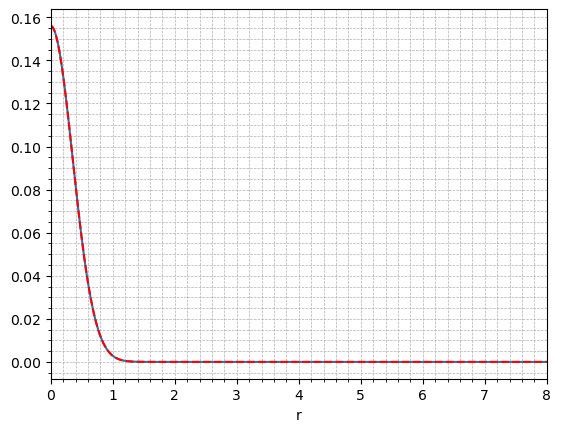

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N = 400                                                   # Truncation ordem

L0 = 1                                              # Map parameter 

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))      # collocation points (Verificado)

colr = col[1:N+2]

r = L0 * colr/(np.sqrt(1-colr**2))                       # physical domain (Verificado)             

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials): 

SB = np.zeros([N+3,N+1])
rSB = np.zeros([N+3,N+1])
rrSB = np.zeros([N+3,N+1])


for i in range(N+1+1+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     


psi = SB[0:N+1,:]        # Base function
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]

# Initial conditions of Phi (Scalar field)                                    

r0 = 0

sigma = 1/2

A0 = 0.078   # 0.77 -> disperses ; 0.7 -> colapse

Phi_0 = A0*(np.exp(-(r-r0)**2/sigma**2)+np.exp(-(r+r0)**2/sigma**2))            # Phi initial data (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_0, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.000001,10,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phi_plot0 = A0*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))      


Phiplot = np.dot(a0, psiplot)


erro = Phi_plot0 - Phiplot

plt.plot(rplot, Phiplot, rplot, Phi_plot0, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.grid(which='both', linestyle='--', linewidth=0.5)  # Grades principais
plt.minorticks_on()  # Ativa grades menores
plt.show()




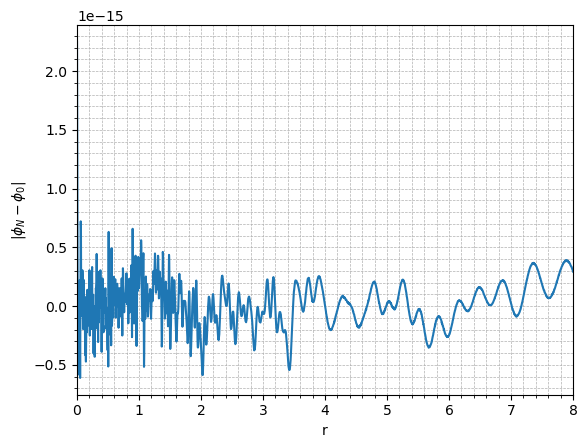

In [196]:
plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.grid(which='both', linestyle='--', linewidth=0.5)  
plt.minorticks_on() 
plt.show()

In [197]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i]  =   0.001
  
Chi=np.dot(c0,psi)    
rChi=np.dot(c0,rpsi)
rrChi=np.dot(c0,rrpsi)     

H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2

JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi     # Jacobian Matrix

inv_JH = np.linalg.inv(JH)

N_int = 50

tol = 1e-18    # tolerance

n = 0
nf = 50

# Newton Raphson loop:
while n <= nf: 
  Chi=np.dot(c0,psi)
  rChi=np.dot(c0,rpsi)
  rrChi=np.dot(c0,rrpsi)
  H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2
  JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi
  cnew = c0 - np.dot(H0, inv_JH)
  if min(abs(cnew-c0)) < tol:
    break
#  print(min(abs(cnew-c0)), end=' ')
  c0 = cnew
  n = n + 1

#out_c = open('c0_30_L02.txt', 'a')
#out_c.write(' ' +' '.join(str('%.18f'%n) for n in c0)+'\n')
#out_c.close()


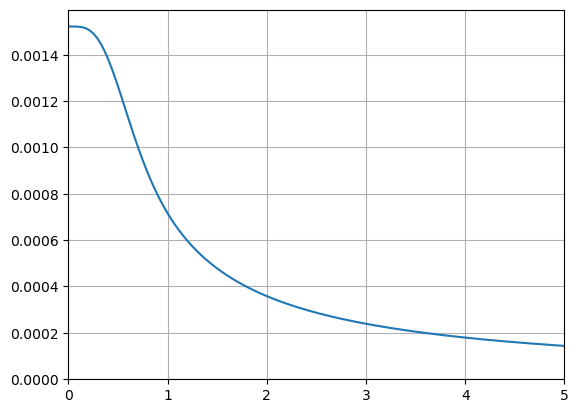

In [198]:
Chiplot = np.dot(c0, psiplot)

rrChiplot = np.dot(c0, rrpsiplot)

plt.plot(rplot,Chiplot)
plt.xlim(0,5)
plt.grid()
plt.show()

In [199]:
# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

SB1 = 1/2*(SB[1:(N+2),:] + SB[0:(N+1),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+2),:] + rSB[0:(N+1),:])
rrSB1 = 1/2*(rrSB[1:(N+2),:] + rrSB[0:(N+1),:])


# Base functions for Beta

SB2 = np.zeros([N+1,N+1])      
rSB2 = np.zeros([N+1,N+1])
rrSB2 = np.zeros([N+1,N+1])

for i in range(N+1):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  

for i in range(N+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)

    

Quadrature Integration

In [200]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1)

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+3,Nq+1])                # Base function in quadrature points
qrSB = np.zeros([Nq+3,Nq+1])
qrrSB = np.zeros([Nq+3,Nq+1])




for i in range(Nq+1+1+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1+1+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

for i in range(Nq+1+1+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                                         


qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
rrqSB1 = 1/2*(qrrSB[1:(N+2),:] + qrrSB[0:(N+1),:])


#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

psi_0 = np.zeros(N+1)

for i in range(N+1):
  psi_0[i,] = np.sin((2*i+1)*math.pi/2)     # arccot(0) = Pi/2  

#Alpha_0 = 1 + np.dot(al0, psi_0) 

In [201]:
# Filtering

Nc = 0

Nf = N - Nc

coef_f = 36
s = 6

#filter1 = np.ones(N+1)
filter1 = np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)

In [185]:
# Runge Kutta 4th order

h = 0.0002   # step size
tf = 7

It = int(tf/h)

#t1 = np.linspace(0, tf, It) 

t = 0

Madm = []
Alpha_origin = []
phi_origin = []
L2HC = []
L2MC = []
phi_set = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)

V = 0

M0 = 2*np.dot(np.arange(1, 2*N + 2, 2), c0) # Madm(t = 0)

 
while t <= tf:
 
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)      
  Pi = np.dot(b0, psi) 
  rPi= np.dot(b0, rpsi)
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)   
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**(1/2))    # L2 error of HC 
  
  # L2-error associated to the momentum constraint
  rqKrr = np.dot(ck0, rqSB1)  
  M = 2*rqChi*qKrr + rqKrr + 3/rq*qKrr + qPi*rqPhi*np.exp(4*qChi)
  L2MC.append((1/2*np.dot(M**2,wq_col))**1/2)    # L2 error of HC 

  # Alpha origin
  Alpha_0 = 1 + np.dot(al0, psi_0)
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(t) + " " + str(Alpha_0))
  out_a.write(',\n')
  
  # Phi origin:  
  phi_0 = np.dot(a0, psi_0)
  phi_origin.append(phi_0)
  out_p.write(str(t) + " " + str(phi_0))
  out_p.write(',\n')

  # Error ADM mass:
  Madm = 2*np.dot(np.arange(1, 2*N + 2, 2), c0)
  Madm_pc = abs(Madm - M0)/M0 * 100  
  Madm_error.append(Madm_pc)  
    
  # Second step
  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi) 
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 

  # Forth step
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi) 
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  
  
  t = t + h
    
#  if t > 9:
#    h=0.0001

  print(f't = {t}')
    
  # Evolution functions
  a0 = filter1*(a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4))
  b0 = filter1*(b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4))
  c0 = filter1*(c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4))  
  phi_set.append(np.dot(a0, psiplot))

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)
#  print(f'a0_max = {max(a0)}, b0_max = {max(b0)}')

out_a.close()
out_p.close() 

t1 = np.linspace(0, tf, len(Alpha_origin)) 

t = 0.0002
t = 0.0004
t = 0.0006000000000000001
t = 0.0008
t = 0.001
t = 0.0012000000000000001
t = 0.0014000000000000002
t = 0.0016000000000000003
t = 0.0018000000000000004
t = 0.0020000000000000005
t = 0.0022000000000000006
t = 0.0024000000000000007
t = 0.0026000000000000007
t = 0.002800000000000001
t = 0.003000000000000001
t = 0.003200000000000001
t = 0.003400000000000001
t = 0.003600000000000001
t = 0.0038000000000000013
t = 0.004000000000000001
t = 0.004200000000000001
t = 0.0044
t = 0.0046
t = 0.0048
t = 0.004999999999999999
t = 0.005199999999999999
t = 0.0053999999999999986
t = 0.005599999999999998
t = 0.005799999999999998
t = 0.0059999999999999975
t = 0.006199999999999997
t = 0.006399999999999997
t = 0.0065999999999999965
t = 0.006799999999999996
t = 0.006999999999999996
t = 0.0071999999999999955
t = 0.007399999999999995
t = 0.007599999999999995
t = 0.0077999999999999944
t = 0.007999999999999995
t = 0.008199999999999995
t = 0.008399999999999996
t = 0.008599999999999997
t = 0.008

t = 0.07420000000000007
t = 0.07440000000000008
t = 0.07460000000000008
t = 0.07480000000000009
t = 0.0750000000000001
t = 0.0752000000000001
t = 0.0754000000000001
t = 0.07560000000000011
t = 0.07580000000000012
t = 0.07600000000000012
t = 0.07620000000000013
t = 0.07640000000000013
t = 0.07660000000000014
t = 0.07680000000000015
t = 0.07700000000000015
t = 0.07720000000000016
t = 0.07740000000000016
t = 0.07760000000000017
t = 0.07780000000000017
t = 0.07800000000000018
t = 0.07820000000000019
t = 0.07840000000000019
t = 0.0786000000000002
t = 0.0788000000000002
t = 0.07900000000000021
t = 0.07920000000000021
t = 0.07940000000000022
t = 0.07960000000000023
t = 0.07980000000000023
t = 0.08000000000000024
t = 0.08020000000000024
t = 0.08040000000000025
t = 0.08060000000000025
t = 0.08080000000000026
t = 0.08100000000000027
t = 0.08120000000000027
t = 0.08140000000000028
t = 0.08160000000000028
t = 0.08180000000000029
t = 0.0820000000000003
t = 0.0822000000000003
t = 0.0824000000000003


t = 0.1520000000000023
t = 0.1522000000000023
t = 0.1524000000000023
t = 0.15260000000000232
t = 0.15280000000000232
t = 0.15300000000000233
t = 0.15320000000000233
t = 0.15340000000000234
t = 0.15360000000000235
t = 0.15380000000000235
t = 0.15400000000000236
t = 0.15420000000000236
t = 0.15440000000000237
t = 0.15460000000000237
t = 0.15480000000000238
t = 0.15500000000000239
t = 0.1552000000000024
t = 0.1554000000000024
t = 0.1556000000000024
t = 0.1558000000000024
t = 0.15600000000000241
t = 0.15620000000000242
t = 0.15640000000000243
t = 0.15660000000000243
t = 0.15680000000000244
t = 0.15700000000000244
t = 0.15720000000000245
t = 0.15740000000000245
t = 0.15760000000000246
t = 0.15780000000000247
t = 0.15800000000000247
t = 0.15820000000000248
t = 0.15840000000000248
t = 0.1586000000000025
t = 0.1588000000000025
t = 0.1590000000000025
t = 0.1592000000000025
t = 0.1594000000000025
t = 0.15960000000000252
t = 0.15980000000000252
t = 0.16000000000000253
t = 0.16020000000000253
t = 

t = 0.22740000000000446
t = 0.22760000000000447
t = 0.22780000000000447
t = 0.22800000000000448
t = 0.22820000000000448
t = 0.2284000000000045
t = 0.2286000000000045
t = 0.2288000000000045
t = 0.2290000000000045
t = 0.2292000000000045
t = 0.22940000000000452
t = 0.22960000000000452
t = 0.22980000000000453
t = 0.23000000000000453
t = 0.23020000000000454
t = 0.23040000000000455
t = 0.23060000000000455
t = 0.23080000000000456
t = 0.23100000000000456
t = 0.23120000000000457
t = 0.23140000000000457
t = 0.23160000000000458
t = 0.23180000000000459
t = 0.2320000000000046
t = 0.2322000000000046
t = 0.2324000000000046
t = 0.2326000000000046
t = 0.23280000000000461
t = 0.23300000000000462
t = 0.23320000000000463
t = 0.23340000000000463
t = 0.23360000000000464
t = 0.23380000000000464
t = 0.23400000000000465
t = 0.23420000000000465
t = 0.23440000000000466
t = 0.23460000000000467
t = 0.23480000000000467
t = 0.23500000000000468
t = 0.23520000000000468
t = 0.2354000000000047
t = 0.2356000000000047
t =

t = 0.3027999999999993
t = 0.30299999999999927
t = 0.30319999999999925
t = 0.3033999999999992
t = 0.3035999999999992
t = 0.3037999999999992
t = 0.30399999999999916
t = 0.30419999999999914
t = 0.3043999999999991
t = 0.3045999999999991
t = 0.30479999999999907
t = 0.30499999999999905
t = 0.305199999999999
t = 0.305399999999999
t = 0.305599999999999
t = 0.30579999999999896
t = 0.30599999999999894
t = 0.3061999999999989
t = 0.3063999999999989
t = 0.3065999999999989
t = 0.30679999999999885
t = 0.30699999999999883
t = 0.3071999999999988
t = 0.3073999999999988
t = 0.30759999999999876
t = 0.30779999999999874
t = 0.3079999999999987
t = 0.3081999999999987
t = 0.3083999999999987
t = 0.30859999999999865
t = 0.30879999999999863
t = 0.3089999999999986
t = 0.3091999999999986
t = 0.30939999999999857
t = 0.30959999999999854
t = 0.3097999999999985
t = 0.3099999999999985
t = 0.3101999999999985
t = 0.31039999999999845
t = 0.31059999999999843
t = 0.3107999999999984
t = 0.3109999999999984
t = 0.3111999999999

t = 0.37939999999999086
t = 0.37959999999999083
t = 0.3797999999999908
t = 0.3799999999999908
t = 0.38019999999999077
t = 0.38039999999999075
t = 0.3805999999999907
t = 0.3807999999999907
t = 0.3809999999999907
t = 0.38119999999999066
t = 0.38139999999999064
t = 0.3815999999999906
t = 0.3817999999999906
t = 0.38199999999999057
t = 0.38219999999999055
t = 0.3823999999999905
t = 0.3825999999999905
t = 0.3827999999999905
t = 0.38299999999999046
t = 0.38319999999999044
t = 0.3833999999999904
t = 0.3835999999999904
t = 0.38379999999999037
t = 0.38399999999999035
t = 0.3841999999999903
t = 0.3843999999999903
t = 0.3845999999999903
t = 0.38479999999999026
t = 0.38499999999999024
t = 0.3851999999999902
t = 0.3853999999999902
t = 0.3855999999999902
t = 0.38579999999999015
t = 0.38599999999999013
t = 0.3861999999999901
t = 0.3863999999999901
t = 0.38659999999999006
t = 0.38679999999999004
t = 0.38699999999999
t = 0.38719999999999
t = 0.38739999999999
t = 0.38759999999998995
t = 0.387799999999989

t = 0.45479999999998255
t = 0.45499999999998253
t = 0.4551999999999825
t = 0.4553999999999825
t = 0.45559999999998246
t = 0.45579999999998244
t = 0.4559999999999824
t = 0.4561999999999824
t = 0.4563999999999824
t = 0.45659999999998235
t = 0.45679999999998233
t = 0.4569999999999823
t = 0.4571999999999823
t = 0.45739999999998227
t = 0.45759999999998224
t = 0.4577999999999822
t = 0.4579999999999822
t = 0.4581999999999822
t = 0.45839999999998216
t = 0.45859999999998213
t = 0.4587999999999821
t = 0.4589999999999821
t = 0.45919999999998207
t = 0.45939999999998204
t = 0.459599999999982
t = 0.459799999999982
t = 0.459999999999982
t = 0.46019999999998196
t = 0.46039999999998193
t = 0.4605999999999819
t = 0.4607999999999819
t = 0.46099999999998187
t = 0.46119999999998185
t = 0.4613999999999818
t = 0.4615999999999818
t = 0.4617999999999818
t = 0.46199999999998176
t = 0.46219999999998174
t = 0.4623999999999817
t = 0.4625999999999817
t = 0.46279999999998167
t = 0.46299999999998165
t = 0.46319999999

t = 0.531999999999974
t = 0.532199999999974
t = 0.532399999999974
t = 0.532599999999974
t = 0.532799999999974
t = 0.5329999999999739
t = 0.5331999999999739
t = 0.5333999999999739
t = 0.5335999999999739
t = 0.5337999999999739
t = 0.5339999999999738
t = 0.5341999999999738
t = 0.5343999999999738
t = 0.5345999999999738
t = 0.5347999999999737
t = 0.5349999999999737
t = 0.5351999999999737
t = 0.5353999999999737
t = 0.5355999999999737
t = 0.5357999999999736
t = 0.5359999999999736
t = 0.5361999999999736
t = 0.5363999999999736
t = 0.5365999999999735
t = 0.5367999999999735
t = 0.5369999999999735
t = 0.5371999999999735
t = 0.5373999999999735
t = 0.5375999999999734
t = 0.5377999999999734
t = 0.5379999999999734
t = 0.5381999999999734
t = 0.5383999999999733
t = 0.5385999999999733
t = 0.5387999999999733
t = 0.5389999999999733
t = 0.5391999999999733
t = 0.5393999999999732
t = 0.5395999999999732
t = 0.5397999999999732
t = 0.5399999999999732
t = 0.5401999999999731
t = 0.5403999999999731
t = 0.5405999999

t = 0.6061999999999659
t = 0.6063999999999659
t = 0.6065999999999658
t = 0.6067999999999658
t = 0.6069999999999658
t = 0.6071999999999658
t = 0.6073999999999657
t = 0.6075999999999657
t = 0.6077999999999657
t = 0.6079999999999657
t = 0.6081999999999657
t = 0.6083999999999656
t = 0.6085999999999656
t = 0.6087999999999656
t = 0.6089999999999656
t = 0.6091999999999655
t = 0.6093999999999655
t = 0.6095999999999655
t = 0.6097999999999655
t = 0.6099999999999655
t = 0.6101999999999654
t = 0.6103999999999654
t = 0.6105999999999654
t = 0.6107999999999654
t = 0.6109999999999653
t = 0.6111999999999653
t = 0.6113999999999653
t = 0.6115999999999653
t = 0.6117999999999653
t = 0.6119999999999652
t = 0.6121999999999652
t = 0.6123999999999652
t = 0.6125999999999652
t = 0.6127999999999652
t = 0.6129999999999651
t = 0.6131999999999651
t = 0.6133999999999651
t = 0.6135999999999651
t = 0.613799999999965
t = 0.613999999999965
t = 0.614199999999965
t = 0.614399999999965
t = 0.614599999999965
t = 0.6147999999

t = 0.677999999999958
t = 0.678199999999958
t = 0.6783999999999579
t = 0.6785999999999579
t = 0.6787999999999579
t = 0.6789999999999579
t = 0.6791999999999578
t = 0.6793999999999578
t = 0.6795999999999578
t = 0.6797999999999578
t = 0.6799999999999577
t = 0.6801999999999577
t = 0.6803999999999577
t = 0.6805999999999577
t = 0.6807999999999577
t = 0.6809999999999576
t = 0.6811999999999576
t = 0.6813999999999576
t = 0.6815999999999576
t = 0.6817999999999576
t = 0.6819999999999575
t = 0.6821999999999575
t = 0.6823999999999575
t = 0.6825999999999575
t = 0.6827999999999574
t = 0.6829999999999574
t = 0.6831999999999574
t = 0.6833999999999574
t = 0.6835999999999574
t = 0.6837999999999573
t = 0.6839999999999573
t = 0.6841999999999573
t = 0.6843999999999573
t = 0.6845999999999572
t = 0.6847999999999572
t = 0.6849999999999572
t = 0.6851999999999572
t = 0.6853999999999572
t = 0.6855999999999571
t = 0.6857999999999571
t = 0.6859999999999571
t = 0.6861999999999571
t = 0.686399999999957
t = 0.68659999

t = 0.7727999999999475
t = 0.7729999999999475
t = 0.7731999999999475
t = 0.7733999999999475
t = 0.7735999999999474
t = 0.7737999999999474
t = 0.7739999999999474
t = 0.7741999999999474
t = 0.7743999999999474
t = 0.7745999999999473
t = 0.7747999999999473
t = 0.7749999999999473
t = 0.7751999999999473
t = 0.7753999999999472
t = 0.7755999999999472
t = 0.7757999999999472
t = 0.7759999999999472
t = 0.7761999999999472
t = 0.7763999999999471
t = 0.7765999999999471
t = 0.7767999999999471
t = 0.7769999999999471
t = 0.777199999999947
t = 0.777399999999947
t = 0.777599999999947
t = 0.777799999999947
t = 0.777999999999947
t = 0.7781999999999469
t = 0.7783999999999469
t = 0.7785999999999469
t = 0.7787999999999469
t = 0.7789999999999468
t = 0.7791999999999468
t = 0.7793999999999468
t = 0.7795999999999468
t = 0.7797999999999468
t = 0.7799999999999467
t = 0.7801999999999467
t = 0.7803999999999467
t = 0.7805999999999467
t = 0.7807999999999466
t = 0.7809999999999466
t = 0.7811999999999466
t = 0.7813999999

t = 0.8473999999999393
t = 0.8475999999999393
t = 0.8477999999999393
t = 0.8479999999999392
t = 0.8481999999999392
t = 0.8483999999999392
t = 0.8485999999999392
t = 0.8487999999999392
t = 0.8489999999999391
t = 0.8491999999999391
t = 0.8493999999999391
t = 0.8495999999999391
t = 0.849799999999939
t = 0.849999999999939
t = 0.850199999999939
t = 0.850399999999939
t = 0.850599999999939
t = 0.8507999999999389
t = 0.8509999999999389
t = 0.8511999999999389
t = 0.8513999999999389
t = 0.8515999999999389
t = 0.8517999999999388
t = 0.8519999999999388
t = 0.8521999999999388
t = 0.8523999999999388
t = 0.8525999999999387
t = 0.8527999999999387
t = 0.8529999999999387
t = 0.8531999999999387
t = 0.8533999999999387
t = 0.8535999999999386
t = 0.8537999999999386
t = 0.8539999999999386
t = 0.8541999999999386
t = 0.8543999999999385
t = 0.8545999999999385
t = 0.8547999999999385
t = 0.8549999999999385
t = 0.8551999999999385
t = 0.8553999999999384
t = 0.8555999999999384
t = 0.8557999999999384
t = 0.8559999999

t = 0.9213999999999312
t = 0.9215999999999311
t = 0.9217999999999311
t = 0.9219999999999311
t = 0.9221999999999311
t = 0.922399999999931
t = 0.922599999999931
t = 0.922799999999931
t = 0.922999999999931
t = 0.923199999999931
t = 0.9233999999999309
t = 0.9235999999999309
t = 0.9237999999999309
t = 0.9239999999999309
t = 0.9241999999999309
t = 0.9243999999999308
t = 0.9245999999999308
t = 0.9247999999999308
t = 0.9249999999999308
t = 0.9251999999999307
t = 0.9253999999999307
t = 0.9255999999999307
t = 0.9257999999999307
t = 0.9259999999999307
t = 0.9261999999999306
t = 0.9263999999999306
t = 0.9265999999999306
t = 0.9267999999999306
t = 0.9269999999999305
t = 0.9271999999999305
t = 0.9273999999999305
t = 0.9275999999999305
t = 0.9277999999999305
t = 0.9279999999999304
t = 0.9281999999999304
t = 0.9283999999999304
t = 0.9285999999999304
t = 0.9287999999999303
t = 0.9289999999999303
t = 0.9291999999999303
t = 0.9293999999999303
t = 0.9295999999999303
t = 0.9297999999999302
t = 0.9299999999

t = 0.9971999999999228
t = 0.9973999999999228
t = 0.9975999999999228
t = 0.9977999999999227
t = 0.9979999999999227
t = 0.9981999999999227
t = 0.9983999999999227
t = 0.9985999999999227
t = 0.9987999999999226
t = 0.9989999999999226
t = 0.9991999999999226
t = 0.9993999999999226
t = 0.9995999999999226
t = 0.9997999999999225
t = 0.9999999999999225
t = 1.0001999999999225
t = 1.0003999999999225
t = 1.0005999999999224
t = 1.0007999999999224
t = 1.0009999999999224
t = 1.0011999999999224
t = 1.0013999999999224
t = 1.0015999999999223
t = 1.0017999999999223
t = 1.0019999999999223
t = 1.0021999999999223
t = 1.0023999999999222
t = 1.0025999999999222
t = 1.0027999999999222
t = 1.0029999999999222
t = 1.0031999999999222
t = 1.0033999999999221
t = 1.003599999999922
t = 1.003799999999922
t = 1.003999999999922
t = 1.004199999999922
t = 1.004399999999922
t = 1.004599999999922
t = 1.004799999999922
t = 1.004999999999922
t = 1.005199999999922
t = 1.005399999999922
t = 1.005599999999922
t = 1.0057999999999219

t = 1.0707999999999147
t = 1.0709999999999147
t = 1.0711999999999147
t = 1.0713999999999146
t = 1.0715999999999146
t = 1.0717999999999146
t = 1.0719999999999146
t = 1.0721999999999146
t = 1.0723999999999145
t = 1.0725999999999145
t = 1.0727999999999145
t = 1.0729999999999145
t = 1.0731999999999144
t = 1.0733999999999144
t = 1.0735999999999144
t = 1.0737999999999144
t = 1.0739999999999144
t = 1.0741999999999143
t = 1.0743999999999143
t = 1.0745999999999143
t = 1.0747999999999143
t = 1.0749999999999142
t = 1.0751999999999142
t = 1.0753999999999142
t = 1.0755999999999142
t = 1.0757999999999142
t = 1.0759999999999141
t = 1.0761999999999141
t = 1.076399999999914
t = 1.076599999999914
t = 1.076799999999914
t = 1.076999999999914
t = 1.077199999999914
t = 1.077399999999914
t = 1.077599999999914
t = 1.077799999999914
t = 1.077999999999914
t = 1.078199999999914
t = 1.0783999999999139
t = 1.0785999999999138
t = 1.0787999999999138
t = 1.0789999999999138
t = 1.0791999999999138
t = 1.079399999999913

t = 1.1435999999999067
t = 1.1437999999999067
t = 1.1439999999999066
t = 1.1441999999999066
t = 1.1443999999999066
t = 1.1445999999999066
t = 1.1447999999999066
t = 1.1449999999999065
t = 1.1451999999999065
t = 1.1453999999999065
t = 1.1455999999999065
t = 1.1457999999999064
t = 1.1459999999999064
t = 1.1461999999999064
t = 1.1463999999999064
t = 1.1465999999999064
t = 1.1467999999999063
t = 1.1469999999999063
t = 1.1471999999999063
t = 1.1473999999999063
t = 1.1475999999999063
t = 1.1477999999999062
t = 1.1479999999999062
t = 1.1481999999999062
t = 1.1483999999999062
t = 1.1485999999999061
t = 1.1487999999999061
t = 1.148999999999906
t = 1.149199999999906
t = 1.149399999999906
t = 1.149599999999906
t = 1.149799999999906
t = 1.149999999999906
t = 1.150199999999906
t = 1.150399999999906
t = 1.150599999999906
t = 1.150799999999906
t = 1.1509999999999059
t = 1.1511999999999059
t = 1.1513999999999058
t = 1.1515999999999058
t = 1.1517999999999058
t = 1.1519999999999058
t = 1.152199999999905

t = 1.2385999999998962
t = 1.2387999999998962
t = 1.2389999999998962
t = 1.2391999999998962
t = 1.2393999999998961
t = 1.2395999999998961
t = 1.239799999999896
t = 1.239999999999896
t = 1.240199999999896
t = 1.240399999999896
t = 1.240599999999896
t = 1.240799999999896
t = 1.240999999999896
t = 1.241199999999896
t = 1.241399999999896
t = 1.241599999999896
t = 1.2417999999998959
t = 1.2419999999998959
t = 1.2421999999998958
t = 1.2423999999998958
t = 1.2425999999998958
t = 1.2427999999998958
t = 1.2429999999998957
t = 1.2431999999998957
t = 1.2433999999998957
t = 1.2435999999998957
t = 1.2437999999998957
t = 1.2439999999998956
t = 1.2441999999998956
t = 1.2443999999998956
t = 1.2445999999998956
t = 1.2447999999998955
t = 1.2449999999998955
t = 1.2451999999998955
t = 1.2453999999998955
t = 1.2455999999998955
t = 1.2457999999998954
t = 1.2459999999998954
t = 1.2461999999998954
t = 1.2463999999998954
t = 1.2465999999998953
t = 1.2467999999998953
t = 1.2469999999998953
t = 1.247199999999895

t = 1.3335999999998858
t = 1.3337999999998857
t = 1.3339999999998857
t = 1.3341999999998857
t = 1.3343999999998857
t = 1.3345999999998857
t = 1.3347999999998856
t = 1.3349999999998856
t = 1.3351999999998856
t = 1.3353999999998856
t = 1.3355999999998855
t = 1.3357999999998855
t = 1.3359999999998855
t = 1.3361999999998855
t = 1.3363999999998855
t = 1.3365999999998854
t = 1.3367999999998854
t = 1.3369999999998854
t = 1.3371999999998854
t = 1.3373999999998853
t = 1.3375999999998853
t = 1.3377999999998853
t = 1.3379999999998853
t = 1.3381999999998853
t = 1.3383999999998852
t = 1.3385999999998852
t = 1.3387999999998852
t = 1.3389999999998852
t = 1.3391999999998851
t = 1.3393999999998851
t = 1.339599999999885
t = 1.339799999999885
t = 1.339999999999885
t = 1.340199999999885
t = 1.340399999999885
t = 1.340599999999885
t = 1.340799999999885
t = 1.340999999999885
t = 1.341199999999885
t = 1.341399999999885
t = 1.3415999999998849
t = 1.3417999999998849
t = 1.3419999999998848
t = 1.342199999999884

t = 1.4269999999998755
t = 1.4271999999998755
t = 1.4273999999998754
t = 1.4275999999998754
t = 1.4277999999998754
t = 1.4279999999998754
t = 1.4281999999998753
t = 1.4283999999998753
t = 1.4285999999998753
t = 1.4287999999998753
t = 1.4289999999998753
t = 1.4291999999998752
t = 1.4293999999998752
t = 1.4295999999998752
t = 1.4297999999998752
t = 1.4299999999998751
t = 1.4301999999998751
t = 1.430399999999875
t = 1.430599999999875
t = 1.430799999999875
t = 1.430999999999875
t = 1.431199999999875
t = 1.431399999999875
t = 1.431599999999875
t = 1.431799999999875
t = 1.431999999999875
t = 1.432199999999875
t = 1.4323999999998749
t = 1.4325999999998749
t = 1.4327999999998748
t = 1.4329999999998748
t = 1.4331999999998748
t = 1.4333999999998748
t = 1.4335999999998748
t = 1.4337999999998747
t = 1.4339999999998747
t = 1.4341999999998747
t = 1.4343999999998747
t = 1.4345999999998746
t = 1.4347999999998746
t = 1.4349999999998746
t = 1.4351999999998746
t = 1.4353999999998746
t = 1.435599999999874

t = 1.5209999999998651
t = 1.521199999999865
t = 1.521399999999865
t = 1.521599999999865
t = 1.521799999999865
t = 1.521999999999865
t = 1.522199999999865
t = 1.522399999999865
t = 1.522599999999865
t = 1.522799999999865
t = 1.522999999999865
t = 1.5231999999998649
t = 1.5233999999998649
t = 1.5235999999998648
t = 1.5237999999998648
t = 1.5239999999998648
t = 1.5241999999998648
t = 1.5243999999998648
t = 1.5245999999998647
t = 1.5247999999998647
t = 1.5249999999998647
t = 1.5251999999998647
t = 1.5253999999998646
t = 1.5255999999998646
t = 1.5257999999998646
t = 1.5259999999998646
t = 1.5261999999998646
t = 1.5263999999998645
t = 1.5265999999998645
t = 1.5267999999998645
t = 1.5269999999998645
t = 1.5271999999998644
t = 1.5273999999998644
t = 1.5275999999998644
t = 1.5277999999998644
t = 1.5279999999998644
t = 1.5281999999998643
t = 1.5283999999998643
t = 1.5285999999998643
t = 1.5287999999998643
t = 1.5289999999998642
t = 1.5291999999998642
t = 1.5293999999998642
t = 1.529599999999864

t = 1.6153999999998547
t = 1.6155999999998547
t = 1.6157999999998547
t = 1.6159999999998547
t = 1.6161999999998546
t = 1.6163999999998546
t = 1.6165999999998546
t = 1.6167999999998546
t = 1.6169999999998546
t = 1.6171999999998545
t = 1.6173999999998545
t = 1.6175999999998545
t = 1.6177999999998545
t = 1.6179999999998544
t = 1.6181999999998544
t = 1.6183999999998544
t = 1.6185999999998544
t = 1.6187999999998544
t = 1.6189999999998543
t = 1.6191999999998543
t = 1.6193999999998543
t = 1.6195999999998543
t = 1.6197999999998542
t = 1.6199999999998542
t = 1.6201999999998542
t = 1.6203999999998542
t = 1.6205999999998542
t = 1.6207999999998541
t = 1.6209999999998541
t = 1.621199999999854
t = 1.621399999999854
t = 1.621599999999854
t = 1.621799999999854
t = 1.621999999999854
t = 1.622199999999854
t = 1.622399999999854
t = 1.622599999999854
t = 1.622799999999854
t = 1.622999999999854
t = 1.6231999999998539
t = 1.6233999999998538
t = 1.6235999999998538
t = 1.6237999999998538
t = 1.623999999999853

t = 1.694599999999846
t = 1.694799999999846
t = 1.694999999999846
t = 1.695199999999846
t = 1.695399999999846
t = 1.695599999999846
t = 1.6957999999998459
t = 1.6959999999998459
t = 1.6961999999998458
t = 1.6963999999998458
t = 1.6965999999998458
t = 1.6967999999998458
t = 1.6969999999998457
t = 1.6971999999998457
t = 1.6973999999998457
t = 1.6975999999998457
t = 1.6977999999998457
t = 1.6979999999998456
t = 1.6981999999998456
t = 1.6983999999998456
t = 1.6985999999998456
t = 1.6987999999998455
t = 1.6989999999998455
t = 1.6991999999998455
t = 1.6993999999998455
t = 1.6995999999998455
t = 1.6997999999998454
t = 1.6999999999998454
t = 1.7001999999998454
t = 1.7003999999998454
t = 1.7005999999998453
t = 1.7007999999998453
t = 1.7009999999998453
t = 1.7011999999998453
t = 1.7013999999998453
t = 1.7015999999998452
t = 1.7017999999998452
t = 1.7019999999998452
t = 1.7021999999998452
t = 1.7023999999998451
t = 1.7025999999998451
t = 1.702799999999845
t = 1.702999999999845
t = 1.7031999999998

t = 1.7691999999998378
t = 1.7693999999998378
t = 1.7695999999998377
t = 1.7697999999998377
t = 1.7699999999998377
t = 1.7701999999998377
t = 1.7703999999998377
t = 1.7705999999998376
t = 1.7707999999998376
t = 1.7709999999998376
t = 1.7711999999998376
t = 1.7713999999998375
t = 1.7715999999998375
t = 1.7717999999998375
t = 1.7719999999998375
t = 1.7721999999998375
t = 1.7723999999998374
t = 1.7725999999998374
t = 1.7727999999998374
t = 1.7729999999998374
t = 1.7731999999998374
t = 1.7733999999998373
t = 1.7735999999998373
t = 1.7737999999998373
t = 1.7739999999998373
t = 1.7741999999998372
t = 1.7743999999998372
t = 1.7745999999998372
t = 1.7747999999998372
t = 1.7749999999998372
t = 1.7751999999998371
t = 1.775399999999837
t = 1.775599999999837
t = 1.775799999999837
t = 1.775999999999837
t = 1.776199999999837
t = 1.776399999999837
t = 1.776599999999837
t = 1.776799999999837
t = 1.776999999999837
t = 1.777199999999837
t = 1.7773999999998369
t = 1.7775999999998369
t = 1.777799999999836

t = 1.8569999999998281
t = 1.857199999999828
t = 1.857399999999828
t = 1.857599999999828
t = 1.857799999999828
t = 1.857999999999828
t = 1.858199999999828
t = 1.858399999999828
t = 1.858599999999828
t = 1.858799999999828
t = 1.858999999999828
t = 1.8591999999998279
t = 1.8593999999998279
t = 1.8595999999998278
t = 1.8597999999998278
t = 1.8599999999998278
t = 1.8601999999998278
t = 1.8603999999998277
t = 1.8605999999998277
t = 1.8607999999998277
t = 1.8609999999998277
t = 1.8611999999998277
t = 1.8613999999998276
t = 1.8615999999998276
t = 1.8617999999998276
t = 1.8619999999998276
t = 1.8621999999998275
t = 1.8623999999998275
t = 1.8625999999998275
t = 1.8627999999998275
t = 1.8629999999998275
t = 1.8631999999998274
t = 1.8633999999998274
t = 1.8635999999998274
t = 1.8637999999998274
t = 1.8639999999998274
t = 1.8641999999998273
t = 1.8643999999998273
t = 1.8645999999998273
t = 1.8647999999998273
t = 1.8649999999998272
t = 1.8651999999998272
t = 1.8653999999998272
t = 1.865599999999827

t = 1.9289999999998202
t = 1.9291999999998202
t = 1.9293999999998201
t = 1.9295999999998201
t = 1.92979999999982
t = 1.92999999999982
t = 1.93019999999982
t = 1.93039999999982
t = 1.93059999999982
t = 1.93079999999982
t = 1.93099999999982
t = 1.93119999999982
t = 1.93139999999982
t = 1.93159999999982
t = 1.9317999999998199
t = 1.9319999999998199
t = 1.9321999999998198
t = 1.9323999999998198
t = 1.9325999999998198
t = 1.9327999999998198
t = 1.9329999999998198
t = 1.9331999999998197
t = 1.9333999999998197
t = 1.9335999999998197
t = 1.9337999999998197
t = 1.9339999999998196
t = 1.9341999999998196
t = 1.9343999999998196
t = 1.9345999999998196
t = 1.9347999999998196
t = 1.9349999999998195
t = 1.9351999999998195
t = 1.9353999999998195
t = 1.9355999999998195
t = 1.9357999999998194
t = 1.9359999999998194
t = 1.9361999999998194
t = 1.9363999999998194
t = 1.9365999999998194
t = 1.9367999999998193
t = 1.9369999999998193
t = 1.9371999999998193
t = 1.9373999999998193
t = 1.9375999999998192
t = 1.93

t = 2.0187999999998105
t = 2.0189999999998105
t = 2.0191999999998105
t = 2.0193999999998105
t = 2.0195999999998104
t = 2.0197999999998104
t = 2.0199999999998104
t = 2.0201999999998104
t = 2.0203999999998103
t = 2.0205999999998103
t = 2.0207999999998103
t = 2.0209999999998103
t = 2.0211999999998103
t = 2.0213999999998102
t = 2.02159999999981
t = 2.02179999999981
t = 2.02199999999981
t = 2.02219999999981
t = 2.02239999999981
t = 2.02259999999981
t = 2.02279999999981
t = 2.02299999999981
t = 2.02319999999981
t = 2.02339999999981
t = 2.02359999999981
t = 2.02379999999981
t = 2.02399999999981
t = 2.02419999999981
t = 2.02439999999981
t = 2.02459999999981
t = 2.02479999999981
t = 2.02499999999981
t = 2.02519999999981
t = 2.02539999999981
t = 2.0255999999998098
t = 2.0257999999998098
t = 2.0259999999998097
t = 2.0261999999998097
t = 2.0263999999998097
t = 2.0265999999998097
t = 2.0267999999998096
t = 2.0269999999998096
t = 2.0271999999998096
t = 2.0273999999998096
t = 2.0275999999998096
t = 2

t = 2.1131999999998
t = 2.1133999999998
t = 2.1135999999998
t = 2.1137999999998
t = 2.1139999999998
t = 2.1141999999998
t = 2.1143999999998
t = 2.1145999999998
t = 2.1147999999998
t = 2.1149999999998
t = 2.1151999999998
t = 2.1153999999998
t = 2.1155999999998
t = 2.1157999999998
t = 2.1159999999998
t = 2.1161999999998
t = 2.1163999999997998
t = 2.1165999999997998
t = 2.1167999999997997
t = 2.1169999999997997
t = 2.1171999999997997
t = 2.1173999999997997
t = 2.1175999999997996
t = 2.1177999999997996
t = 2.1179999999997996
t = 2.1181999999997996
t = 2.1183999999997996
t = 2.1185999999997995
t = 2.1187999999997995
t = 2.1189999999997995
t = 2.1191999999997995
t = 2.1193999999997994
t = 2.1195999999997994
t = 2.1197999999997994
t = 2.1199999999997994
t = 2.1201999999997994
t = 2.1203999999997993
t = 2.1205999999997993
t = 2.1207999999997993
t = 2.1209999999997993
t = 2.1211999999997992
t = 2.1213999999997992
t = 2.121599999999799
t = 2.121799999999799
t = 2.121999999999799
t = 2.1221999999

t = 2.20519999999979
t = 2.20539999999979
t = 2.20559999999979
t = 2.20579999999979
t = 2.20599999999979
t = 2.20619999999979
t = 2.20639999999979
t = 2.20659999999979
t = 2.20679999999979
t = 2.20699999999979
t = 2.2071999999997898
t = 2.2073999999997898
t = 2.2075999999997897
t = 2.2077999999997897
t = 2.2079999999997897
t = 2.2081999999997897
t = 2.2083999999997896
t = 2.2085999999997896
t = 2.2087999999997896
t = 2.2089999999997896
t = 2.2091999999997896
t = 2.2093999999997895
t = 2.2095999999997895
t = 2.2097999999997895
t = 2.2099999999997895
t = 2.2101999999997894
t = 2.2103999999997894
t = 2.2105999999997894
t = 2.2107999999997894
t = 2.2109999999997894
t = 2.2111999999997893
t = 2.2113999999997893
t = 2.2115999999997893
t = 2.2117999999997893
t = 2.2119999999997892
t = 2.2121999999997892
t = 2.212399999999789
t = 2.212599999999789
t = 2.212799999999789
t = 2.212999999999789
t = 2.213199999999789
t = 2.213399999999789
t = 2.213599999999789
t = 2.213799999999789
t = 2.2139999999

t = 2.2997999999997796
t = 2.2999999999997796
t = 2.3001999999997795
t = 2.3003999999997795
t = 2.3005999999997795
t = 2.3007999999997795
t = 2.3009999999997794
t = 2.3011999999997794
t = 2.3013999999997794
t = 2.3015999999997794
t = 2.3017999999997794
t = 2.3019999999997793
t = 2.3021999999997793
t = 2.3023999999997793
t = 2.3025999999997793
t = 2.3027999999997792
t = 2.3029999999997792
t = 2.303199999999779
t = 2.303399999999779
t = 2.303599999999779
t = 2.303799999999779
t = 2.303999999999779
t = 2.304199999999779
t = 2.304399999999779
t = 2.304599999999779
t = 2.304799999999779
t = 2.304999999999779
t = 2.305199999999779
t = 2.305399999999779
t = 2.305599999999779
t = 2.305799999999779
t = 2.305999999999779
t = 2.306199999999779
t = 2.306399999999779
t = 2.306599999999779
t = 2.306799999999779
t = 2.306999999999779
t = 2.3071999999997788
t = 2.3073999999997787
t = 2.3075999999997787
t = 2.3077999999997787
t = 2.3079999999997787
t = 2.3081999999997787
t = 2.3083999999997786
t = 2.30

t = 2.38839999999977
t = 2.38859999999977
t = 2.3887999999997698
t = 2.3889999999997698
t = 2.3891999999997697
t = 2.3893999999997697
t = 2.3895999999997697
t = 2.3897999999997697
t = 2.3899999999997696
t = 2.3901999999997696
t = 2.3903999999997696
t = 2.3905999999997696
t = 2.3907999999997696
t = 2.3909999999997695
t = 2.3911999999997695
t = 2.3913999999997695
t = 2.3915999999997695
t = 2.3917999999997694
t = 2.3919999999997694
t = 2.3921999999997694
t = 2.3923999999997694
t = 2.3925999999997694
t = 2.3927999999997693
t = 2.3929999999997693
t = 2.3931999999997693
t = 2.3933999999997693
t = 2.3935999999997692
t = 2.3937999999997692
t = 2.393999999999769
t = 2.394199999999769
t = 2.394399999999769
t = 2.394599999999769
t = 2.394799999999769
t = 2.394999999999769
t = 2.395199999999769
t = 2.395399999999769
t = 2.395599999999769
t = 2.395799999999769
t = 2.395999999999769
t = 2.396199999999769
t = 2.396399999999769
t = 2.396599999999769
t = 2.396799999999769
t = 2.396999999999769
t = 2.39

t = 2.4795999999997598
t = 2.4797999999997598
t = 2.4799999999997597
t = 2.4801999999997597
t = 2.4803999999997597
t = 2.4805999999997597
t = 2.4807999999997596
t = 2.4809999999997596
t = 2.4811999999997596
t = 2.4813999999997596
t = 2.4815999999997596
t = 2.4817999999997595
t = 2.4819999999997595
t = 2.4821999999997595
t = 2.4823999999997595
t = 2.4825999999997594
t = 2.4827999999997594
t = 2.4829999999997594
t = 2.4831999999997594
t = 2.4833999999997594
t = 2.4835999999997593
t = 2.4837999999997593
t = 2.4839999999997593
t = 2.4841999999997593
t = 2.4843999999997592
t = 2.4845999999997592
t = 2.484799999999759
t = 2.484999999999759
t = 2.485199999999759
t = 2.485399999999759
t = 2.485599999999759
t = 2.485799999999759
t = 2.485999999999759
t = 2.486199999999759
t = 2.486399999999759
t = 2.486599999999759
t = 2.486799999999759
t = 2.486999999999759
t = 2.487199999999759
t = 2.487399999999759
t = 2.487599999999759
t = 2.487799999999759
t = 2.487999999999759
t = 2.488199999999759
t = 2.

t = 2.56779999999975
t = 2.56799999999975
t = 2.56819999999975
t = 2.56839999999975
t = 2.56859999999975
t = 2.56879999999975
t = 2.56899999999975
t = 2.56919999999975
t = 2.56939999999975
t = 2.56959999999975
t = 2.56979999999975
t = 2.56999999999975
t = 2.57019999999975
t = 2.5703999999997498
t = 2.5705999999997498
t = 2.5707999999997497
t = 2.5709999999997497
t = 2.5711999999997497
t = 2.5713999999997497
t = 2.5715999999997496
t = 2.5717999999997496
t = 2.5719999999997496
t = 2.5721999999997496
t = 2.5723999999997496
t = 2.5725999999997495
t = 2.5727999999997495
t = 2.5729999999997495
t = 2.5731999999997495
t = 2.5733999999997494
t = 2.5735999999997494
t = 2.5737999999997494
t = 2.5739999999997494
t = 2.5741999999997494
t = 2.5743999999997493
t = 2.5745999999997493
t = 2.5747999999997493
t = 2.5749999999997493
t = 2.5751999999997492
t = 2.5753999999997492
t = 2.575599999999749
t = 2.575799999999749
t = 2.575999999999749
t = 2.576199999999749
t = 2.576399999999749
t = 2.5765999999997

t = 2.65919999999974
t = 2.65939999999974
t = 2.65959999999974
t = 2.65979999999974
t = 2.65999999999974
t = 2.66019999999974
t = 2.66039999999974
t = 2.66059999999974
t = 2.66079999999974
t = 2.66099999999974
t = 2.6611999999997398
t = 2.6613999999997398
t = 2.6615999999997397
t = 2.6617999999997397
t = 2.6619999999997397
t = 2.6621999999997397
t = 2.6623999999997396
t = 2.6625999999997396
t = 2.6627999999997396
t = 2.6629999999997396
t = 2.6631999999997396
t = 2.6633999999997395
t = 2.6635999999997395
t = 2.6637999999997395
t = 2.6639999999997395
t = 2.6641999999997394
t = 2.6643999999997394
t = 2.6645999999997394
t = 2.6647999999997394
t = 2.6649999999997394
t = 2.6651999999997393
t = 2.6653999999997393
t = 2.6655999999997393
t = 2.6657999999997393
t = 2.6659999999997392
t = 2.6661999999997392
t = 2.666399999999739
t = 2.666599999999739
t = 2.666799999999739
t = 2.666999999999739
t = 2.667199999999739
t = 2.667399999999739
t = 2.667599999999739
t = 2.667799999999739
t = 2.6679999999

t = 2.74899999999973
t = 2.74919999999973
t = 2.74939999999973
t = 2.74959999999973
t = 2.74979999999973
t = 2.74999999999973
t = 2.75019999999973
t = 2.75039999999973
t = 2.75059999999973
t = 2.75079999999973
t = 2.75099999999973
t = 2.75119999999973
t = 2.75139999999973
t = 2.75159999999973
t = 2.75179999999973
t = 2.7519999999997298
t = 2.7521999999997298
t = 2.7523999999997297
t = 2.7525999999997297
t = 2.7527999999997297
t = 2.7529999999997297
t = 2.7531999999997296
t = 2.7533999999997296
t = 2.7535999999997296
t = 2.7537999999997296
t = 2.7539999999997296
t = 2.7541999999997295
t = 2.7543999999997295
t = 2.7545999999997295
t = 2.7547999999997295
t = 2.7549999999997294
t = 2.7551999999997294
t = 2.7553999999997294
t = 2.7555999999997294
t = 2.7557999999997294
t = 2.7559999999997293
t = 2.7561999999997293
t = 2.7563999999997293
t = 2.7565999999997293
t = 2.7567999999997292
t = 2.7569999999997292
t = 2.757199999999729
t = 2.757399999999729
t = 2.757599999999729
t = 2.757799999999729

t = 2.832799999999721
t = 2.832999999999721
t = 2.833199999999721
t = 2.833399999999721
t = 2.833599999999721
t = 2.8337999999997208
t = 2.8339999999997207
t = 2.8341999999997207
t = 2.8343999999997207
t = 2.8345999999997207
t = 2.8347999999997207
t = 2.8349999999997206
t = 2.8351999999997206
t = 2.8353999999997206
t = 2.8355999999997206
t = 2.8357999999997205
t = 2.8359999999997205
t = 2.8361999999997205
t = 2.8363999999997205
t = 2.8365999999997205
t = 2.8367999999997204
t = 2.8369999999997204
t = 2.8371999999997204
t = 2.8373999999997204
t = 2.8375999999997203
t = 2.8377999999997203
t = 2.8379999999997203
t = 2.8381999999997203
t = 2.8383999999997203
t = 2.8385999999997202
t = 2.83879999999972
t = 2.83899999999972
t = 2.83919999999972
t = 2.83939999999972
t = 2.83959999999972
t = 2.83979999999972
t = 2.83999999999972
t = 2.84019999999972
t = 2.84039999999972
t = 2.84059999999972
t = 2.84079999999972
t = 2.84099999999972
t = 2.84119999999972
t = 2.84139999999972
t = 2.84159999999972


t = 2.9199999999997113
t = 2.9201999999997112
t = 2.9203999999997112
t = 2.920599999999711
t = 2.920799999999711
t = 2.920999999999711
t = 2.921199999999711
t = 2.921399999999711
t = 2.921599999999711
t = 2.921799999999711
t = 2.921999999999711
t = 2.922199999999711
t = 2.922399999999711
t = 2.922599999999711
t = 2.922799999999711
t = 2.922999999999711
t = 2.923199999999711
t = 2.923399999999711
t = 2.923599999999711
t = 2.923799999999711
t = 2.923999999999711
t = 2.924199999999711
t = 2.924399999999711
t = 2.9245999999997108
t = 2.9247999999997107
t = 2.9249999999997107
t = 2.9251999999997107
t = 2.9253999999997107
t = 2.9255999999997107
t = 2.9257999999997106
t = 2.9259999999997106
t = 2.9261999999997106
t = 2.9263999999997106
t = 2.9265999999997105
t = 2.9267999999997105
t = 2.9269999999997105
t = 2.9271999999997105
t = 2.9273999999997105
t = 2.9275999999997104
t = 2.9277999999997104
t = 2.9279999999997104
t = 2.9281999999997104
t = 2.9283999999997103
t = 2.9285999999997103
t = 2.92

t = 3.0089999999997015
t = 3.0091999999997014
t = 3.0093999999997014
t = 3.0095999999997014
t = 3.0097999999997014
t = 3.0099999999997014
t = 3.0101999999997013
t = 3.0103999999997013
t = 3.0105999999997013
t = 3.0107999999997013
t = 3.0109999999997012
t = 3.0111999999997012
t = 3.011399999999701
t = 3.011599999999701
t = 3.011799999999701
t = 3.011999999999701
t = 3.012199999999701
t = 3.012399999999701
t = 3.012599999999701
t = 3.012799999999701
t = 3.012999999999701
t = 3.013199999999701
t = 3.013399999999701
t = 3.013599999999701
t = 3.013799999999701
t = 3.013999999999701
t = 3.014199999999701
t = 3.014399999999701
t = 3.014599999999701
t = 3.014799999999701
t = 3.014999999999701
t = 3.015199999999701
t = 3.0153999999997008
t = 3.0155999999997007
t = 3.0157999999997007
t = 3.0159999999997007
t = 3.0161999999997007
t = 3.0163999999997007
t = 3.0165999999997006
t = 3.0167999999997006
t = 3.0169999999997006
t = 3.0171999999997006
t = 3.0173999999997005
t = 3.0175999999997005
t = 3.01

t = 3.095799999999692
t = 3.095999999999692
t = 3.096199999999692
t = 3.096399999999692
t = 3.096599999999692
t = 3.096799999999692
t = 3.0969999999996918
t = 3.0971999999996918
t = 3.0973999999996917
t = 3.0975999999996917
t = 3.0977999999996917
t = 3.0979999999996917
t = 3.0981999999996916
t = 3.0983999999996916
t = 3.0985999999996916
t = 3.0987999999996916
t = 3.0989999999996916
t = 3.0991999999996915
t = 3.0993999999996915
t = 3.0995999999996915
t = 3.0997999999996915
t = 3.0999999999996914
t = 3.1001999999996914
t = 3.1003999999996914
t = 3.1005999999996914
t = 3.1007999999996914
t = 3.1009999999996913
t = 3.1011999999996913
t = 3.1013999999996913
t = 3.1015999999996913
t = 3.1017999999996912
t = 3.1019999999996912
t = 3.102199999999691
t = 3.102399999999691
t = 3.102599999999691
t = 3.102799999999691
t = 3.102999999999691
t = 3.103199999999691
t = 3.103399999999691
t = 3.103599999999691
t = 3.103799999999691
t = 3.103999999999691
t = 3.104199999999691
t = 3.104399999999691
t = 3.

t = 3.185799999999682
t = 3.185999999999682
t = 3.186199999999682
t = 3.186399999999682
t = 3.186599999999682
t = 3.186799999999682
t = 3.186999999999682
t = 3.187199999999682
t = 3.187399999999682
t = 3.187599999999682
t = 3.1877999999996818
t = 3.1879999999996818
t = 3.1881999999996817
t = 3.1883999999996817
t = 3.1885999999996817
t = 3.1887999999996817
t = 3.1889999999996816
t = 3.1891999999996816
t = 3.1893999999996816
t = 3.1895999999996816
t = 3.1897999999996816
t = 3.1899999999996815
t = 3.1901999999996815
t = 3.1903999999996815
t = 3.1905999999996815
t = 3.1907999999996814
t = 3.1909999999996814
t = 3.1911999999996814
t = 3.1913999999996814
t = 3.1915999999996814
t = 3.1917999999996813
t = 3.1919999999996813
t = 3.1921999999996813
t = 3.1923999999996813
t = 3.1925999999996812
t = 3.1927999999996812
t = 3.192999999999681
t = 3.193199999999681
t = 3.193399999999681
t = 3.193599999999681
t = 3.193799999999681
t = 3.193999999999681
t = 3.194199999999681
t = 3.194399999999681
t = 3.

t = 3.274599999999672
t = 3.274799999999672
t = 3.274999999999672
t = 3.275199999999672
t = 3.275399999999672
t = 3.275599999999672
t = 3.275799999999672
t = 3.275999999999672
t = 3.276199999999672
t = 3.276399999999672
t = 3.276599999999672
t = 3.276799999999672
t = 3.276999999999672
t = 3.277199999999672
t = 3.277399999999672
t = 3.277599999999672
t = 3.277799999999672
t = 3.277999999999672
t = 3.278199999999672
t = 3.278399999999672
t = 3.2785999999996718
t = 3.2787999999996718
t = 3.2789999999996717
t = 3.2791999999996717
t = 3.2793999999996717
t = 3.2795999999996717
t = 3.2797999999996716
t = 3.2799999999996716
t = 3.2801999999996716
t = 3.2803999999996716
t = 3.2805999999996716
t = 3.2807999999996715
t = 3.2809999999996715
t = 3.2811999999996715
t = 3.2813999999996715
t = 3.2815999999996714
t = 3.2817999999996714
t = 3.2819999999996714
t = 3.2821999999996714
t = 3.2823999999996714
t = 3.2825999999996713
t = 3.2827999999996713
t = 3.2829999999996713
t = 3.2831999999996713
t = 3.28

t = 3.357999999999663
t = 3.358199999999663
t = 3.358399999999663
t = 3.358599999999663
t = 3.358799999999663
t = 3.358999999999663
t = 3.359199999999663
t = 3.359399999999663
t = 3.359599999999663
t = 3.359799999999663
t = 3.359999999999663
t = 3.360199999999663
t = 3.3603999999996628
t = 3.3605999999996627
t = 3.3607999999996627
t = 3.3609999999996627
t = 3.3611999999996627
t = 3.3613999999996627
t = 3.3615999999996626
t = 3.3617999999996626
t = 3.3619999999996626
t = 3.3621999999996626
t = 3.3623999999996625
t = 3.3625999999996625
t = 3.3627999999996625
t = 3.3629999999996625
t = 3.3631999999996625
t = 3.3633999999996624
t = 3.3635999999996624
t = 3.3637999999996624
t = 3.3639999999996624
t = 3.3641999999996623
t = 3.3643999999996623
t = 3.3645999999996623
t = 3.3647999999996623
t = 3.3649999999996623
t = 3.3651999999996622
t = 3.365399999999662
t = 3.365599999999662
t = 3.365799999999662
t = 3.365999999999662
t = 3.366199999999662
t = 3.366399999999662
t = 3.366599999999662
t = 3.3

t = 3.4455999999996534
t = 3.4457999999996534
t = 3.4459999999996533
t = 3.4461999999996533
t = 3.4463999999996533
t = 3.4465999999996533
t = 3.4467999999996533
t = 3.4469999999996532
t = 3.447199999999653
t = 3.447399999999653
t = 3.447599999999653
t = 3.447799999999653
t = 3.447999999999653
t = 3.448199999999653
t = 3.448399999999653
t = 3.448599999999653
t = 3.448799999999653
t = 3.448999999999653
t = 3.449199999999653
t = 3.449399999999653
t = 3.449599999999653
t = 3.449799999999653
t = 3.449999999999653
t = 3.450199999999653
t = 3.450399999999653
t = 3.450599999999653
t = 3.450799999999653
t = 3.450999999999653
t = 3.4511999999996528
t = 3.4513999999996527
t = 3.4515999999996527
t = 3.4517999999996527
t = 3.4519999999996527
t = 3.4521999999996527
t = 3.4523999999996526
t = 3.4525999999996526
t = 3.4527999999996526
t = 3.4529999999996526
t = 3.4531999999996525
t = 3.4533999999996525
t = 3.4535999999996525
t = 3.4537999999996525
t = 3.4539999999996525
t = 3.4541999999996524
t = 3.45

t = 3.531999999999644
t = 3.532199999999644
t = 3.532399999999644
t = 3.532599999999644
t = 3.532799999999644
t = 3.5329999999996438
t = 3.5331999999996437
t = 3.5333999999996437
t = 3.5335999999996437
t = 3.5337999999996437
t = 3.5339999999996436
t = 3.5341999999996436
t = 3.5343999999996436
t = 3.5345999999996436
t = 3.5347999999996436
t = 3.5349999999996435
t = 3.5351999999996435
t = 3.5353999999996435
t = 3.5355999999996435
t = 3.5357999999996435
t = 3.5359999999996434
t = 3.5361999999996434
t = 3.5363999999996434
t = 3.5365999999996434
t = 3.5367999999996433
t = 3.5369999999996433
t = 3.5371999999996433
t = 3.5373999999996433
t = 3.5375999999996433
t = 3.5377999999996432
t = 3.537999999999643
t = 3.538199999999643
t = 3.538399999999643
t = 3.538599999999643
t = 3.538799999999643
t = 3.538999999999643
t = 3.539199999999643
t = 3.539399999999643
t = 3.539599999999643
t = 3.539799999999643
t = 3.539999999999643
t = 3.540199999999643
t = 3.540399999999643
t = 3.540599999999643
t = 3.5

t = 3.6247999999996336
t = 3.6249999999996336
t = 3.6251999999996336
t = 3.6253999999996336
t = 3.6255999999996336
t = 3.6257999999996335
t = 3.6259999999996335
t = 3.6261999999996335
t = 3.6263999999996335
t = 3.6265999999996335
t = 3.6267999999996334
t = 3.6269999999996334
t = 3.6271999999996334
t = 3.6273999999996334
t = 3.6275999999996333
t = 3.6277999999996333
t = 3.6279999999996333
t = 3.6281999999996333
t = 3.6283999999996333
t = 3.6285999999996332
t = 3.628799999999633
t = 3.628999999999633
t = 3.629199999999633
t = 3.629399999999633
t = 3.629599999999633
t = 3.629799999999633
t = 3.629999999999633
t = 3.630199999999633
t = 3.630399999999633
t = 3.630599999999633
t = 3.630799999999633
t = 3.630999999999633
t = 3.631199999999633
t = 3.631399999999633
t = 3.631599999999633
t = 3.631799999999633
t = 3.631999999999633
t = 3.632199999999633
t = 3.632399999999633
t = 3.632599999999633
t = 3.6327999999996328
t = 3.6329999999996327
t = 3.6331999999996327
t = 3.6333999999996327
t = 3.63

t = 3.7159999999996236
t = 3.7161999999996236
t = 3.7163999999996236
t = 3.7165999999996235
t = 3.7167999999996235
t = 3.7169999999996235
t = 3.7171999999996235
t = 3.7173999999996235
t = 3.7175999999996234
t = 3.7177999999996234
t = 3.7179999999996234
t = 3.7181999999996234
t = 3.7183999999996233
t = 3.7185999999996233
t = 3.7187999999996233
t = 3.7189999999996233
t = 3.7191999999996233
t = 3.7193999999996232
t = 3.719599999999623
t = 3.719799999999623
t = 3.719999999999623
t = 3.720199999999623
t = 3.720399999999623
t = 3.720599999999623
t = 3.720799999999623
t = 3.720999999999623
t = 3.721199999999623
t = 3.721399999999623
t = 3.721599999999623
t = 3.721799999999623
t = 3.721999999999623
t = 3.722199999999623
t = 3.722399999999623
t = 3.722599999999623
t = 3.722799999999623
t = 3.722999999999623
t = 3.723199999999623
t = 3.723399999999623
t = 3.7235999999996228
t = 3.7237999999996227
t = 3.7239999999996227
t = 3.7241999999996227
t = 3.7243999999996227
t = 3.7245999999996227
t = 3.72

t = 3.8081999999996134
t = 3.8083999999996134
t = 3.8085999999996134
t = 3.8087999999996134
t = 3.8089999999996134
t = 3.8091999999996133
t = 3.8093999999996133
t = 3.8095999999996133
t = 3.8097999999996133
t = 3.8099999999996133
t = 3.8101999999996132
t = 3.810399999999613
t = 3.810599999999613
t = 3.810799999999613
t = 3.810999999999613
t = 3.811199999999613
t = 3.811399999999613
t = 3.811599999999613
t = 3.811799999999613
t = 3.811999999999613
t = 3.812199999999613
t = 3.812399999999613
t = 3.812599999999613
t = 3.812799999999613
t = 3.812999999999613
t = 3.813199999999613
t = 3.813399999999613
t = 3.813599999999613
t = 3.813799999999613
t = 3.813999999999613
t = 3.814199999999613
t = 3.8143999999996128
t = 3.8145999999996127
t = 3.8147999999996127
t = 3.8149999999996127
t = 3.8151999999996127
t = 3.8153999999996127
t = 3.8155999999996126
t = 3.8157999999996126
t = 3.8159999999996126
t = 3.8161999999996126
t = 3.8163999999996125
t = 3.8165999999996125
t = 3.8167999999996125
t = 3.81

t = 3.8987999999996035
t = 3.8989999999996034
t = 3.8991999999996034
t = 3.8993999999996034
t = 3.8995999999996034
t = 3.8997999999996034
t = 3.8999999999996033
t = 3.9001999999996033
t = 3.9003999999996033
t = 3.9005999999996033
t = 3.9007999999996033
t = 3.9009999999996032
t = 3.901199999999603
t = 3.901399999999603
t = 3.901599999999603
t = 3.901799999999603
t = 3.901999999999603
t = 3.902199999999603
t = 3.902399999999603
t = 3.902599999999603
t = 3.902799999999603
t = 3.902999999999603
t = 3.903199999999603
t = 3.903399999999603
t = 3.903599999999603
t = 3.903799999999603
t = 3.903999999999603
t = 3.904199999999603
t = 3.904399999999603
t = 3.904599999999603
t = 3.904799999999603
t = 3.904999999999603
t = 3.9051999999996028
t = 3.9053999999996027
t = 3.9055999999996027
t = 3.9057999999996027
t = 3.9059999999996027
t = 3.9061999999996027
t = 3.9063999999996026
t = 3.9065999999996026
t = 3.9067999999996026
t = 3.9069999999996026
t = 3.9071999999996025
t = 3.9073999999996025
t = 3.90

t = 3.9911999999995933
t = 3.9913999999995933
t = 3.9915999999995933
t = 3.9917999999995932
t = 3.991999999999593
t = 3.992199999999593
t = 3.992399999999593
t = 3.992599999999593
t = 3.992799999999593
t = 3.992999999999593
t = 3.993199999999593
t = 3.993399999999593
t = 3.993599999999593
t = 3.993799999999593
t = 3.993999999999593
t = 3.994199999999593
t = 3.994399999999593
t = 3.994599999999593
t = 3.994799999999593
t = 3.994999999999593
t = 3.995199999999593
t = 3.995399999999593
t = 3.995599999999593
t = 3.995799999999593
t = 3.9959999999995928
t = 3.9961999999995927
t = 3.9963999999995927
t = 3.9965999999995927
t = 3.9967999999995927
t = 3.9969999999995927
t = 3.9971999999995926
t = 3.9973999999995926
t = 3.9975999999995926
t = 3.9977999999995926
t = 3.9979999999995925
t = 3.9981999999995925
t = 3.9983999999995925
t = 3.9985999999995925
t = 3.9987999999995925
t = 3.9989999999995924
t = 3.9991999999995924
t = 3.9993999999995924
t = 3.9995999999995924
t = 3.9997999999995923
t = 3.99

t = 4.081999999999765
t = 4.082199999999766
t = 4.082399999999766
t = 4.082599999999767
t = 4.082799999999767
t = 4.0829999999997675
t = 4.083199999999768
t = 4.083399999999768
t = 4.083599999999769
t = 4.083799999999769
t = 4.08399999999977
t = 4.08419999999977
t = 4.08439999999977
t = 4.084599999999771
t = 4.084799999999771
t = 4.084999999999772
t = 4.085199999999772
t = 4.0853999999997725
t = 4.085599999999773
t = 4.085799999999773
t = 4.085999999999774
t = 4.086199999999774
t = 4.086399999999775
t = 4.086599999999775
t = 4.0867999999997755
t = 4.086999999999776
t = 4.087199999999776
t = 4.087399999999777
t = 4.087599999999777
t = 4.087799999999778
t = 4.087999999999778
t = 4.0881999999997785
t = 4.088399999999779
t = 4.088599999999779
t = 4.08879999999978
t = 4.08899999999978
t = 4.089199999999781
t = 4.089399999999781
t = 4.089599999999781
t = 4.089799999999782
t = 4.089999999999782
t = 4.090199999999783
t = 4.090399999999783
t = 4.0905999999997835
t = 4.090799999999784
t = 4.0909

t = 4.1739999999999595
t = 4.17419999999996
t = 4.17439999999996
t = 4.174599999999961
t = 4.174799999999961
t = 4.174999999999962
t = 4.175199999999962
t = 4.1753999999999625
t = 4.175599999999963
t = 4.175799999999963
t = 4.175999999999964
t = 4.176199999999964
t = 4.176399999999965
t = 4.176599999999965
t = 4.176799999999965
t = 4.176999999999966
t = 4.177199999999966
t = 4.177399999999967
t = 4.177599999999967
t = 4.1777999999999675
t = 4.177999999999968
t = 4.178199999999968
t = 4.178399999999969
t = 4.178599999999969
t = 4.17879999999997
t = 4.17899999999997
t = 4.1791999999999705
t = 4.179399999999971
t = 4.179599999999971
t = 4.179799999999972
t = 4.179999999999972
t = 4.180199999999973
t = 4.180399999999973
t = 4.1805999999999734
t = 4.180799999999974
t = 4.180999999999974
t = 4.181199999999975
t = 4.181399999999975
t = 4.181599999999976
t = 4.181799999999976
t = 4.181999999999976
t = 4.182199999999977
t = 4.182399999999977
t = 4.182599999999978
t = 4.182799999999978
t = 4.182

t = 4.264600000000151
t = 4.264800000000151
t = 4.265000000000152
t = 4.265200000000152
t = 4.265400000000152
t = 4.265600000000153
t = 4.265800000000153
t = 4.266000000000154
t = 4.266200000000154
t = 4.2664000000001545
t = 4.266600000000155
t = 4.266800000000155
t = 4.267000000000156
t = 4.267200000000156
t = 4.267400000000157
t = 4.267600000000157
t = 4.2678000000001575
t = 4.268000000000158
t = 4.268200000000158
t = 4.268400000000159
t = 4.268600000000159
t = 4.26880000000016
t = 4.26900000000016
t = 4.26920000000016
t = 4.269400000000161
t = 4.269600000000161
t = 4.269800000000162
t = 4.270000000000162
t = 4.2702000000001625
t = 4.270400000000163
t = 4.270600000000163
t = 4.270800000000164
t = 4.271000000000164
t = 4.271200000000165
t = 4.271400000000165
t = 4.2716000000001655
t = 4.271800000000166
t = 4.272000000000166
t = 4.272200000000167
t = 4.272400000000167
t = 4.272600000000168
t = 4.272800000000168
t = 4.273000000000168
t = 4.273200000000169
t = 4.273400000000169
t = 4.273

t = 4.356000000000344
t = 4.356200000000344
t = 4.356400000000344
t = 4.356600000000345
t = 4.356800000000345
t = 4.357000000000346
t = 4.357200000000346
t = 4.3574000000003466
t = 4.357600000000347
t = 4.357800000000347
t = 4.358000000000348
t = 4.358200000000348
t = 4.358400000000349
t = 4.358600000000349
t = 4.3588000000003495
t = 4.35900000000035
t = 4.35920000000035
t = 4.359400000000351
t = 4.359600000000351
t = 4.359800000000352
t = 4.360000000000352
t = 4.3602000000003525
t = 4.360400000000353
t = 4.360600000000353
t = 4.360800000000354
t = 4.361000000000354
t = 4.361200000000355
t = 4.361400000000355
t = 4.361600000000355
t = 4.361800000000356
t = 4.362000000000356
t = 4.362200000000357
t = 4.362400000000357
t = 4.3626000000003575
t = 4.362800000000358
t = 4.363000000000358
t = 4.363200000000359
t = 4.363400000000359
t = 4.36360000000036
t = 4.36380000000036
t = 4.3640000000003605
t = 4.364200000000361
t = 4.364400000000361
t = 4.364600000000362
t = 4.364800000000362
t = 4.365

t = 4.447600000000537
t = 4.447800000000537
t = 4.448000000000538
t = 4.448200000000538
t = 4.448400000000539
t = 4.448600000000539
t = 4.448800000000539
t = 4.44900000000054
t = 4.44920000000054
t = 4.449400000000541
t = 4.449600000000541
t = 4.4498000000005415
t = 4.450000000000542
t = 4.450200000000542
t = 4.450400000000543
t = 4.450600000000543
t = 4.450800000000544
t = 4.451000000000544
t = 4.4512000000005445
t = 4.451400000000545
t = 4.451600000000545
t = 4.451800000000546
t = 4.452000000000546
t = 4.452200000000547
t = 4.452400000000547
t = 4.4526000000005475
t = 4.452800000000548
t = 4.453000000000548
t = 4.453200000000549
t = 4.453400000000549
t = 4.45360000000055
t = 4.45380000000055
t = 4.45400000000055
t = 4.454200000000551
t = 4.454400000000551
t = 4.454600000000552
t = 4.454800000000552
t = 4.4550000000005525
t = 4.455200000000553
t = 4.455400000000553
t = 4.455600000000554
t = 4.455800000000554
t = 4.456000000000555
t = 4.456200000000555
t = 4.4564000000005555
t = 4.4566

t = 4.539600000000731
t = 4.5398000000007315
t = 4.540000000000732
t = 4.540200000000732
t = 4.540400000000733
t = 4.540600000000733
t = 4.540800000000734
t = 4.541000000000734
t = 4.541200000000734
t = 4.541400000000735
t = 4.541600000000735
t = 4.541800000000736
t = 4.542000000000736
t = 4.5422000000007365
t = 4.542400000000737
t = 4.542600000000737
t = 4.542800000000738
t = 4.543000000000738
t = 4.543200000000739
t = 4.543400000000739
t = 4.5436000000007395
t = 4.54380000000074
t = 4.54400000000074
t = 4.544200000000741
t = 4.544400000000741
t = 4.544600000000742
t = 4.544800000000742
t = 4.5450000000007424
t = 4.545200000000743
t = 4.545400000000743
t = 4.545600000000744
t = 4.545800000000744
t = 4.546000000000745
t = 4.546200000000745
t = 4.546400000000745
t = 4.546600000000746
t = 4.546800000000746
t = 4.547000000000747
t = 4.547200000000747
t = 4.5474000000007475
t = 4.547600000000748
t = 4.547800000000748
t = 4.548000000000749
t = 4.548200000000749
t = 4.54840000000075
t = 4.54

t = 4.629600000000921
t = 4.629800000000921
t = 4.630000000000922
t = 4.630200000000922
t = 4.630400000000923
t = 4.630600000000923
t = 4.6308000000009235
t = 4.631000000000924
t = 4.631200000000924
t = 4.631400000000925
t = 4.631600000000925
t = 4.631800000000926
t = 4.632000000000926
t = 4.6322000000009265
t = 4.632400000000927
t = 4.632600000000927
t = 4.632800000000928
t = 4.633000000000928
t = 4.633200000000929
t = 4.633400000000929
t = 4.633600000000929
t = 4.63380000000093
t = 4.63400000000093
t = 4.634200000000931
t = 4.634400000000931
t = 4.6346000000009315
t = 4.634800000000932
t = 4.635000000000932
t = 4.635200000000933
t = 4.635400000000933
t = 4.635600000000934
t = 4.635800000000934
t = 4.6360000000009345
t = 4.636200000000935
t = 4.636400000000935
t = 4.636600000000936
t = 4.636800000000936
t = 4.637000000000937
t = 4.637200000000937
t = 4.637400000000937
t = 4.637600000000938
t = 4.637800000000938
t = 4.638000000000939
t = 4.638200000000939
t = 4.6384000000009395
t = 4.6

t = 4.720800000001113
t = 4.721000000001114
t = 4.721200000001114
t = 4.721400000001115
t = 4.721600000001115
t = 4.7218000000011155
t = 4.722000000001116
t = 4.722200000001116
t = 4.722400000001117
t = 4.722600000001117
t = 4.722800000001118
t = 4.723000000001118
t = 4.7232000000011185
t = 4.723400000001119
t = 4.723600000001119
t = 4.72380000000112
t = 4.72400000000112
t = 4.724200000001121
t = 4.724400000001121
t = 4.7246000000011215
t = 4.724800000001122
t = 4.725000000001122
t = 4.725200000001123
t = 4.725400000001123
t = 4.725600000001124
t = 4.725800000001124
t = 4.726000000001124
t = 4.726200000001125
t = 4.726400000001125
t = 4.726600000001126
t = 4.726800000001126
t = 4.7270000000011265
t = 4.727200000001127
t = 4.727400000001127
t = 4.727600000001128
t = 4.727800000001128
t = 4.728000000001129
t = 4.728200000001129
t = 4.7284000000011295
t = 4.72860000000113
t = 4.72880000000113
t = 4.729000000001131
t = 4.729200000001131
t = 4.729400000001132
t = 4.729600000001132
t = 4.729

t = 4.807400000001296
t = 4.807600000001297
t = 4.807800000001297
t = 4.8080000000012975
t = 4.808200000001298
t = 4.808400000001298
t = 4.808600000001299
t = 4.808800000001299
t = 4.8090000000013
t = 4.8092000000013
t = 4.8094000000013
t = 4.809600000001301
t = 4.809800000001301
t = 4.810000000001302
t = 4.810200000001302
t = 4.8104000000013025
t = 4.810600000001303
t = 4.810800000001303
t = 4.811000000001304
t = 4.811200000001304
t = 4.811400000001305
t = 4.811600000001305
t = 4.8118000000013055
t = 4.812000000001306
t = 4.812200000001306
t = 4.812400000001307
t = 4.812600000001307
t = 4.812800000001308
t = 4.813000000001308
t = 4.813200000001308
t = 4.813400000001309
t = 4.813600000001309
t = 4.81380000000131
t = 4.81400000000131
t = 4.8142000000013105
t = 4.814400000001311
t = 4.814600000001311
t = 4.814800000001312
t = 4.815000000001312
t = 4.815200000001313
t = 4.815400000001313
t = 4.8156000000013135
t = 4.815800000001314
t = 4.816000000001314
t = 4.816200000001315
t = 4.8164000

t = 4.89440000000148
t = 4.89460000000148
t = 4.894800000001481
t = 4.895000000001481
t = 4.8952000000014815
t = 4.895400000001482
t = 4.895600000001482
t = 4.895800000001483
t = 4.896000000001483
t = 4.896200000001484
t = 4.896400000001484
t = 4.896600000001484
t = 4.896800000001485
t = 4.897000000001485
t = 4.897200000001486
t = 4.897400000001486
t = 4.8976000000014865
t = 4.897800000001487
t = 4.898000000001487
t = 4.898200000001488
t = 4.898400000001488
t = 4.898600000001489
t = 4.898800000001489
t = 4.8990000000014895
t = 4.89920000000149
t = 4.89940000000149
t = 4.899600000001491
t = 4.899800000001491
t = 4.900000000001492
t = 4.900200000001492
t = 4.9004000000014925
t = 4.900600000001493
t = 4.900800000001493
t = 4.901000000001494
t = 4.901200000001494
t = 4.901400000001495
t = 4.901600000001495
t = 4.901800000001495
t = 4.902000000001496
t = 4.902200000001496
t = 4.902400000001497
t = 4.902600000001497
t = 4.9028000000014975
t = 4.903000000001498
t = 4.903200000001498
t = 4.903

t = 4.979400000001659
t = 4.97960000000166
t = 4.97980000000166
t = 4.98000000000166
t = 4.980200000001661
t = 4.980400000001661
t = 4.980600000001662
t = 4.980800000001662
t = 4.9810000000016625
t = 4.981200000001663
t = 4.981400000001663
t = 4.981600000001664
t = 4.981800000001664
t = 4.982000000001665
t = 4.982200000001665
t = 4.9824000000016655
t = 4.982600000001666
t = 4.982800000001666
t = 4.983000000001667
t = 4.983200000001667
t = 4.983400000001668
t = 4.983600000001668
t = 4.9838000000016685
t = 4.984000000001669
t = 4.984200000001669
t = 4.98440000000167
t = 4.98460000000167
t = 4.984800000001671
t = 4.985000000001671
t = 4.985200000001671
t = 4.985400000001672
t = 4.985600000001672
t = 4.985800000001673
t = 4.986000000001673
t = 4.9862000000016735
t = 4.986400000001674
t = 4.986600000001674
t = 4.986800000001675
t = 4.987000000001675
t = 4.987200000001676
t = 4.987400000001676
t = 4.9876000000016765
t = 4.987800000001677
t = 4.988000000001677
t = 4.988200000001678
t = 4.9884

t = 5.066200000001842
t = 5.066400000001843
t = 5.066600000001843
t = 5.066800000001844
t = 5.067000000001844
t = 5.0672000000018445
t = 5.067400000001845
t = 5.067600000001845
t = 5.067800000001846
t = 5.068000000001846
t = 5.068200000001847
t = 5.068400000001847
t = 5.068600000001847
t = 5.068800000001848
t = 5.069000000001848
t = 5.069200000001849
t = 5.069400000001849
t = 5.0696000000018495
t = 5.06980000000185
t = 5.07000000000185
t = 5.070200000001851
t = 5.070400000001851
t = 5.070600000001852
t = 5.070800000001852
t = 5.0710000000018525
t = 5.071200000001853
t = 5.071400000001853
t = 5.071600000001854
t = 5.071800000001854
t = 5.072000000001855
t = 5.072200000001855
t = 5.072400000001855
t = 5.072600000001856
t = 5.072800000001856
t = 5.073000000001857
t = 5.073200000001857
t = 5.0734000000018575
t = 5.073600000001858
t = 5.073800000001858
t = 5.074000000001859
t = 5.074200000001859
t = 5.07440000000186
t = 5.07460000000186
t = 5.0748000000018605
t = 5.075000000001861
t = 5.075

t = 5.148600000002016
t = 5.148800000002017
t = 5.149000000002017
t = 5.1492000000020175
t = 5.149400000002018
t = 5.149600000002018
t = 5.149800000002019
t = 5.150000000002019
t = 5.15020000000202
t = 5.15040000000202
t = 5.1506000000020205
t = 5.150800000002021
t = 5.151000000002021
t = 5.151200000002022
t = 5.151400000002022
t = 5.151600000002023
t = 5.151800000002023
t = 5.152000000002023
t = 5.152200000002024
t = 5.152400000002024
t = 5.152600000002025
t = 5.152800000002025
t = 5.1530000000020255
t = 5.153200000002026
t = 5.153400000002026
t = 5.153600000002027
t = 5.153800000002027
t = 5.154000000002028
t = 5.154200000002028
t = 5.1544000000020285
t = 5.154600000002029
t = 5.154800000002029
t = 5.15500000000203
t = 5.15520000000203
t = 5.155400000002031
t = 5.155600000002031
t = 5.155800000002031
t = 5.156000000002032
t = 5.156200000002032
t = 5.156400000002033
t = 5.156600000002033
t = 5.1568000000020335
t = 5.157000000002034
t = 5.157200000002034
t = 5.157400000002035
t = 5.157

t = 5.225200000002178
t = 5.225400000002178
t = 5.225600000002179
t = 5.225800000002179
t = 5.22600000000218
t = 5.22620000000218
t = 5.22640000000218
t = 5.226600000002181
t = 5.226800000002181
t = 5.227000000002182
t = 5.227200000002182
t = 5.2274000000021825
t = 5.227600000002183
t = 5.227800000002183
t = 5.228000000002184
t = 5.228200000002184
t = 5.228400000002185
t = 5.228600000002185
t = 5.2288000000021855
t = 5.229000000002186
t = 5.229200000002186
t = 5.229400000002187
t = 5.229600000002187
t = 5.229800000002188
t = 5.230000000002188
t = 5.230200000002188
t = 5.230400000002189
t = 5.230600000002189
t = 5.23080000000219
t = 5.23100000000219
t = 5.2312000000021905
t = 5.231400000002191
t = 5.231600000002191
t = 5.231800000002192
t = 5.232000000002192
t = 5.232200000002193
t = 5.232400000002193
t = 5.2326000000021935
t = 5.232800000002194
t = 5.233000000002194
t = 5.233200000002195
t = 5.233400000002195
t = 5.233600000002196
t = 5.233800000002196
t = 5.2340000000021965
t = 5.2342

t = 5.316800000002371
t = 5.317000000002372
t = 5.317200000002372
t = 5.3174000000023725
t = 5.317600000002373
t = 5.317800000002373
t = 5.318000000002374
t = 5.318200000002374
t = 5.318400000002375
t = 5.318600000002375
t = 5.318800000002375
t = 5.319000000002376
t = 5.319200000002376
t = 5.319400000002377
t = 5.319600000002377
t = 5.3198000000023775
t = 5.320000000002378
t = 5.320200000002378
t = 5.320400000002379
t = 5.320600000002379
t = 5.32080000000238
t = 5.32100000000238
t = 5.3212000000023805
t = 5.321400000002381
t = 5.321600000002381
t = 5.321800000002382
t = 5.322000000002382
t = 5.322200000002383
t = 5.322400000002383
t = 5.322600000002383
t = 5.322800000002384
t = 5.323000000002384
t = 5.323200000002385
t = 5.323400000002385
t = 5.3236000000023855
t = 5.323800000002386
t = 5.324000000002386
t = 5.324200000002387
t = 5.324400000002387
t = 5.324600000002388
t = 5.324800000002388
t = 5.3250000000023885
t = 5.325200000002389
t = 5.325400000002389
t = 5.32560000000239
t = 5.32

t = 5.405400000002558
t = 5.405600000002559
t = 5.405800000002559
t = 5.406000000002559
t = 5.40620000000256
t = 5.40640000000256
t = 5.406600000002561
t = 5.406800000002561
t = 5.4070000000025615
t = 5.407200000002562
t = 5.407400000002562
t = 5.407600000002563
t = 5.407800000002563
t = 5.408000000002564
t = 5.408200000002564
t = 5.4084000000025645
t = 5.408600000002565
t = 5.408800000002565
t = 5.409000000002566
t = 5.409200000002566
t = 5.409400000002567
t = 5.409600000002567
t = 5.409800000002567
t = 5.410000000002568
t = 5.410200000002568
t = 5.410400000002569
t = 5.410600000002569
t = 5.4108000000025696
t = 5.41100000000257
t = 5.41120000000257
t = 5.411400000002571
t = 5.411600000002571
t = 5.411800000002572
t = 5.412000000002572
t = 5.4122000000025725
t = 5.412400000002573
t = 5.412600000002573
t = 5.412800000002574
t = 5.413000000002574
t = 5.413200000002575
t = 5.413400000002575
t = 5.4136000000025755
t = 5.413800000002576
t = 5.414000000002576
t = 5.414200000002577
t = 5.414

t = 5.49640000000275
t = 5.496600000002751
t = 5.496800000002751
t = 5.4970000000027515
t = 5.497200000002752
t = 5.497400000002752
t = 5.497600000002753
t = 5.497800000002753
t = 5.498000000002754
t = 5.498200000002754
t = 5.498400000002754
t = 5.498600000002755
t = 5.498800000002755
t = 5.499000000002756
t = 5.499200000002756
t = 5.4994000000027565
t = 5.499600000002757
t = 5.499800000002757
t = 5.500000000002758
t = 5.500200000002758
t = 5.500400000002759
t = 5.500600000002759
t = 5.5008000000027595
t = 5.50100000000276
t = 5.50120000000276
t = 5.501400000002761
t = 5.501600000002761
t = 5.501800000002762
t = 5.502000000002762
t = 5.502200000002762
t = 5.502400000002763
t = 5.502600000002763
t = 5.502800000002764
t = 5.503000000002764
t = 5.5032000000027645
t = 5.503400000002765
t = 5.503600000002765
t = 5.503800000002766
t = 5.504000000002766
t = 5.504200000002767
t = 5.504400000002767
t = 5.5046000000027675
t = 5.504800000002768
t = 5.505000000002768
t = 5.505200000002769
t = 5.50

t = 5.589000000002946
t = 5.589200000002946
t = 5.5894000000029465
t = 5.589600000002947
t = 5.589800000002947
t = 5.590000000002948
t = 5.590200000002948
t = 5.590400000002949
t = 5.590600000002949
t = 5.590800000002949
t = 5.59100000000295
t = 5.59120000000295
t = 5.591400000002951
t = 5.591600000002951
t = 5.5918000000029515
t = 5.592000000002952
t = 5.592200000002952
t = 5.592400000002953
t = 5.592600000002953
t = 5.592800000002954
t = 5.593000000002954
t = 5.5932000000029545
t = 5.593400000002955
t = 5.593600000002955
t = 5.593800000002956
t = 5.594000000002956
t = 5.594200000002957
t = 5.594400000002957
t = 5.594600000002957
t = 5.594800000002958
t = 5.595000000002958
t = 5.595200000002959
t = 5.595400000002959
t = 5.5956000000029595
t = 5.59580000000296
t = 5.59600000000296
t = 5.596200000002961
t = 5.596400000002961
t = 5.596600000002962
t = 5.596800000002962
t = 5.5970000000029625
t = 5.597200000002963
t = 5.597400000002963
t = 5.597600000002964
t = 5.597800000002964
t = 5.598

t = 5.678400000003134
t = 5.678600000003135
t = 5.678800000003135
t = 5.6790000000031355
t = 5.679200000003136
t = 5.679400000003136
t = 5.679600000003137
t = 5.679800000003137
t = 5.680000000003138
t = 5.680200000003138
t = 5.6804000000031385
t = 5.680600000003139
t = 5.680800000003139
t = 5.68100000000314
t = 5.68120000000314
t = 5.681400000003141
t = 5.681600000003141
t = 5.6818000000031414
t = 5.682000000003142
t = 5.682200000003142
t = 5.682400000003143
t = 5.682600000003143
t = 5.682800000003144
t = 5.683000000003144
t = 5.683200000003144
t = 5.683400000003145
t = 5.683600000003145
t = 5.683800000003146
t = 5.684000000003146
t = 5.6842000000031465
t = 5.684400000003147
t = 5.684600000003147
t = 5.684800000003148
t = 5.685000000003148
t = 5.685200000003149
t = 5.685400000003149
t = 5.6856000000031495
t = 5.68580000000315
t = 5.68600000000315
t = 5.686200000003151
t = 5.686400000003151
t = 5.686600000003152
t = 5.686800000003152
t = 5.687000000003152
t = 5.687200000003153
t = 5.687

t = 5.7676000000033225
t = 5.767800000003323
t = 5.768000000003323
t = 5.768200000003324
t = 5.768400000003324
t = 5.768600000003325
t = 5.768800000003325
t = 5.7690000000033255
t = 5.769200000003326
t = 5.769400000003326
t = 5.769600000003327
t = 5.769800000003327
t = 5.770000000003328
t = 5.770200000003328
t = 5.770400000003328
t = 5.770600000003329
t = 5.770800000003329
t = 5.77100000000333
t = 5.77120000000333
t = 5.7714000000033305
t = 5.771600000003331
t = 5.771800000003331
t = 5.772000000003332
t = 5.772200000003332
t = 5.772400000003333
t = 5.772600000003333
t = 5.7728000000033335
t = 5.773000000003334
t = 5.773200000003334
t = 5.773400000003335
t = 5.773600000003335
t = 5.773800000003336
t = 5.774000000003336
t = 5.774200000003336
t = 5.774400000003337
t = 5.774600000003337
t = 5.774800000003338
t = 5.775000000003338
t = 5.7752000000033386
t = 5.775400000003339
t = 5.775600000003339
t = 5.77580000000334
t = 5.77600000000334
t = 5.776200000003341
t = 5.776400000003341
t = 5.776

t = 5.853200000003503
t = 5.853400000003504
t = 5.853600000003504
t = 5.853800000003504
t = 5.854000000003505
t = 5.854200000003505
t = 5.854400000003506
t = 5.854600000003506
t = 5.8548000000035065
t = 5.855000000003507
t = 5.855200000003507
t = 5.855400000003508
t = 5.855600000003508
t = 5.855800000003509
t = 5.856000000003509
t = 5.8562000000035095
t = 5.85640000000351
t = 5.85660000000351
t = 5.856800000003511
t = 5.857000000003511
t = 5.857200000003512
t = 5.857400000003512
t = 5.857600000003512
t = 5.857800000003513
t = 5.858000000003513
t = 5.858200000003514
t = 5.858400000003514
t = 5.8586000000035146
t = 5.858800000003515
t = 5.859000000003515
t = 5.859200000003516
t = 5.859400000003516
t = 5.859600000003517
t = 5.859800000003517
t = 5.8600000000035175
t = 5.860200000003518
t = 5.860400000003518
t = 5.860600000003519
t = 5.860800000003519
t = 5.86100000000352
t = 5.86120000000352
t = 5.8614000000035205
t = 5.861600000003521
t = 5.861800000003521
t = 5.862000000003522
t = 5.862

t = 5.945200000003697
t = 5.945400000003698
t = 5.945600000003698
t = 5.945800000003699
t = 5.946000000003699
t = 5.946200000003699
t = 5.9464000000037
t = 5.9466000000037
t = 5.946800000003701
t = 5.947000000003701
t = 5.9472000000037015
t = 5.947400000003702
t = 5.947600000003702
t = 5.947800000003703
t = 5.948000000003703
t = 5.948200000003704
t = 5.948400000003704
t = 5.9486000000037045
t = 5.948800000003705
t = 5.949000000003705
t = 5.949200000003706
t = 5.949400000003706
t = 5.949600000003707
t = 5.949800000003707
t = 5.950000000003707
t = 5.950200000003708
t = 5.950400000003708
t = 5.950600000003709
t = 5.950800000003709
t = 5.9510000000037095
t = 5.95120000000371
t = 5.95140000000371
t = 5.951600000003711
t = 5.951800000003711
t = 5.952000000003712
t = 5.952200000003712
t = 5.9524000000037125
t = 5.952600000003713
t = 5.952800000003713
t = 5.953000000003714
t = 5.953200000003714
t = 5.953400000003715
t = 5.953600000003715
t = 5.9538000000037155
t = 5.954000000003716
t = 5.95420

t = 6.031000000003878
t = 6.031200000003879
t = 6.031400000003879
t = 6.03160000000388
t = 6.03180000000388
t = 6.0320000000038805
t = 6.032200000003881
t = 6.032400000003881
t = 6.032600000003882
t = 6.032800000003882
t = 6.033000000003883
t = 6.033200000003883
t = 6.033400000003883
t = 6.033600000003884
t = 6.033800000003884
t = 6.034000000003885
t = 6.034200000003885
t = 6.0344000000038855
t = 6.034600000003886
t = 6.034800000003886
t = 6.035000000003887
t = 6.035200000003887
t = 6.035400000003888
t = 6.035600000003888
t = 6.0358000000038885
t = 6.036000000003889
t = 6.036200000003889
t = 6.03640000000389
t = 6.03660000000389
t = 6.036800000003891
t = 6.037000000003891
t = 6.0372000000038915
t = 6.037400000003892
t = 6.037600000003892
t = 6.037800000003893
t = 6.038000000003893
t = 6.038200000003894
t = 6.038400000003894
t = 6.038600000003894
t = 6.038800000003895
t = 6.039000000003895
t = 6.039200000003896
t = 6.039400000003896
t = 6.0396000000038965
t = 6.039800000003897
t = 6.040

t = 6.122400000004071
t = 6.122600000004072
t = 6.122800000004072
t = 6.1230000000040725
t = 6.123200000004073
t = 6.123400000004073
t = 6.123600000004074
t = 6.123800000004074
t = 6.124000000004075
t = 6.124200000004075
t = 6.1244000000040755
t = 6.124600000004076
t = 6.124800000004076
t = 6.125000000004077
t = 6.125200000004077
t = 6.125400000004078
t = 6.125600000004078
t = 6.125800000004078
t = 6.126000000004079
t = 6.126200000004079
t = 6.12640000000408
t = 6.12660000000408
t = 6.1268000000040805
t = 6.127000000004081
t = 6.127200000004081
t = 6.127400000004082
t = 6.127600000004082
t = 6.127800000004083
t = 6.128000000004083
t = 6.1282000000040835
t = 6.128400000004084
t = 6.128600000004084
t = 6.128800000004085
t = 6.129000000004085
t = 6.129200000004086
t = 6.129400000004086
t = 6.1296000000040864
t = 6.129800000004087
t = 6.130000000004087
t = 6.130200000004088
t = 6.130400000004088
t = 6.130600000004089
t = 6.130800000004089
t = 6.131000000004089
t = 6.13120000000409
t = 6.13

t = 6.2116000000042595
t = 6.21180000000426
t = 6.21200000000426
t = 6.212200000004261
t = 6.212400000004261
t = 6.212600000004262
t = 6.212800000004262
t = 6.2130000000042624
t = 6.213200000004263
t = 6.213400000004263
t = 6.213600000004264
t = 6.213800000004264
t = 6.214000000004265
t = 6.214200000004265
t = 6.214400000004265
t = 6.214600000004266
t = 6.214800000004266
t = 6.215000000004267
t = 6.215200000004267
t = 6.2154000000042675
t = 6.215600000004268
t = 6.215800000004268
t = 6.216000000004269
t = 6.216200000004269
t = 6.21640000000427
t = 6.21660000000427
t = 6.2168000000042705
t = 6.217000000004271
t = 6.217200000004271
t = 6.217400000004272
t = 6.217600000004272
t = 6.217800000004273
t = 6.218000000004273
t = 6.218200000004273
t = 6.218400000004274
t = 6.218600000004274
t = 6.218800000004275
t = 6.219000000004275
t = 6.2192000000042755
t = 6.219400000004276
t = 6.219600000004276
t = 6.219800000004277
t = 6.220000000004277
t = 6.220200000004278
t = 6.220400000004278
t = 6.220

t = 6.292800000004431
t = 6.293000000004431
t = 6.293200000004432
t = 6.293400000004432
t = 6.2936000000044325
t = 6.293800000004433
t = 6.294000000004433
t = 6.294200000004434
t = 6.294400000004434
t = 6.294600000004435
t = 6.294800000004435
t = 6.2950000000044355
t = 6.295200000004436
t = 6.295400000004436
t = 6.295600000004437
t = 6.295800000004437
t = 6.296000000004438
t = 6.296200000004438
t = 6.2964000000044384
t = 6.296600000004439
t = 6.296800000004439
t = 6.29700000000444
t = 6.29720000000444
t = 6.297400000004441
t = 6.297600000004441
t = 6.297800000004441
t = 6.298000000004442
t = 6.298200000004442
t = 6.298400000004443
t = 6.298600000004443
t = 6.2988000000044435
t = 6.299000000004444
t = 6.299200000004444
t = 6.299400000004445
t = 6.299600000004445
t = 6.299800000004446
t = 6.300000000004446
t = 6.3002000000044465
t = 6.300400000004447
t = 6.300600000004447
t = 6.300800000004448
t = 6.301000000004448
t = 6.301200000004449
t = 6.301400000004449
t = 6.301600000004449
t = 6.3

t = 6.3822000000046195
t = 6.38240000000462
t = 6.38260000000462
t = 6.382800000004621
t = 6.383000000004621
t = 6.383200000004622
t = 6.383400000004622
t = 6.3836000000046225
t = 6.383800000004623
t = 6.384000000004623
t = 6.384200000004624
t = 6.384400000004624
t = 6.384600000004625
t = 6.384800000004625
t = 6.385000000004625
t = 6.385200000004626
t = 6.385400000004626
t = 6.385600000004627
t = 6.385800000004627
t = 6.3860000000046275
t = 6.386200000004628
t = 6.386400000004628
t = 6.386600000004629
t = 6.386800000004629
t = 6.38700000000463
t = 6.38720000000463
t = 6.3874000000046305
t = 6.387600000004631
t = 6.387800000004631
t = 6.388000000004632
t = 6.388200000004632
t = 6.388400000004633
t = 6.388600000004633
t = 6.388800000004633
t = 6.389000000004634
t = 6.389200000004634
t = 6.389400000004635
t = 6.389600000004635
t = 6.3898000000046355
t = 6.390000000004636
t = 6.390200000004636
t = 6.390400000004637
t = 6.390600000004637
t = 6.390800000004638
t = 6.391000000004638
t = 6.391

t = 6.470400000004806
t = 6.470600000004806
t = 6.4708000000048065
t = 6.471000000004807
t = 6.471200000004807
t = 6.471400000004808
t = 6.471600000004808
t = 6.471800000004809
t = 6.472000000004809
t = 6.472200000004809
t = 6.47240000000481
t = 6.47260000000481
t = 6.472800000004811
t = 6.473000000004811
t = 6.4732000000048115
t = 6.473400000004812
t = 6.473600000004812
t = 6.473800000004813
t = 6.474000000004813
t = 6.474200000004814
t = 6.474400000004814
t = 6.4746000000048145
t = 6.474800000004815
t = 6.475000000004815
t = 6.475200000004816
t = 6.475400000004816
t = 6.475600000004817
t = 6.475800000004817
t = 6.4760000000048175
t = 6.476200000004818
t = 6.476400000004818
t = 6.476600000004819
t = 6.476800000004819
t = 6.47700000000482
t = 6.47720000000482
t = 6.47740000000482
t = 6.477600000004821
t = 6.477800000004821
t = 6.478000000004822
t = 6.478200000004822
t = 6.4784000000048225
t = 6.478600000004823
t = 6.478800000004823
t = 6.479000000004824
t = 6.479200000004824
t = 6.4794

t = 6.559800000004994
t = 6.560000000004995
t = 6.560200000004995
t = 6.560400000004996
t = 6.560600000004996
t = 6.560800000004996
t = 6.561000000004997
t = 6.561200000004997
t = 6.561400000004998
t = 6.561600000004998
t = 6.5618000000049985
t = 6.562000000004999
t = 6.562200000004999
t = 6.562400000005
t = 6.562600000005
t = 6.562800000005001
t = 6.563000000005001
t = 6.5632000000050015
t = 6.563400000005002
t = 6.563600000005002
t = 6.563800000005003
t = 6.564000000005003
t = 6.564200000005004
t = 6.564400000005004
t = 6.564600000005004
t = 6.564800000005005
t = 6.565000000005005
t = 6.565200000005006
t = 6.565400000005006
t = 6.5656000000050065
t = 6.565800000005007
t = 6.566000000005007
t = 6.566200000005008
t = 6.566400000005008
t = 6.566600000005009
t = 6.566800000005009
t = 6.5670000000050095
t = 6.56720000000501
t = 6.56740000000501
t = 6.567600000005011
t = 6.567800000005011
t = 6.568000000005012
t = 6.568200000005012
t = 6.5684000000050125
t = 6.568600000005013
t = 6.5688000

t = 6.6490000000051825
t = 6.649200000005183
t = 6.649400000005183
t = 6.649600000005184
t = 6.649800000005184
t = 6.650000000005185
t = 6.650200000005185
t = 6.6504000000051855
t = 6.650600000005186
t = 6.650800000005186
t = 6.651000000005187
t = 6.651200000005187
t = 6.651400000005188
t = 6.651600000005188
t = 6.6518000000051885
t = 6.652000000005189
t = 6.652200000005189
t = 6.65240000000519
t = 6.65260000000519
t = 6.652800000005191
t = 6.653000000005191
t = 6.653200000005191
t = 6.653400000005192
t = 6.653600000005192
t = 6.653800000005193
t = 6.654000000005193
t = 6.6542000000051935
t = 6.654400000005194
t = 6.654600000005194
t = 6.654800000005195
t = 6.655000000005195
t = 6.655200000005196
t = 6.655400000005196
t = 6.6556000000051965
t = 6.655800000005197
t = 6.656000000005197
t = 6.656200000005198
t = 6.656400000005198
t = 6.656600000005199
t = 6.656800000005199
t = 6.657000000005199
t = 6.6572000000052
t = 6.6574000000052
t = 6.657600000005201
t = 6.657800000005201
t = 6.65800

t = 6.736000000005366
t = 6.736200000005367
t = 6.736400000005367
t = 6.736600000005367
t = 6.736800000005368
t = 6.737000000005368
t = 6.737200000005369
t = 6.737400000005369
t = 6.7376000000053695
t = 6.73780000000537
t = 6.73800000000537
t = 6.738200000005371
t = 6.738400000005371
t = 6.738600000005372
t = 6.738800000005372
t = 6.7390000000053725
t = 6.739200000005373
t = 6.739400000005373
t = 6.739600000005374
t = 6.739800000005374
t = 6.740000000005375
t = 6.740200000005375
t = 6.740400000005375
t = 6.740600000005376
t = 6.740800000005376
t = 6.741000000005377
t = 6.741200000005377
t = 6.7414000000053775
t = 6.741600000005378
t = 6.741800000005378
t = 6.742000000005379
t = 6.742200000005379
t = 6.74240000000538
t = 6.74260000000538
t = 6.7428000000053805
t = 6.743000000005381
t = 6.743200000005381
t = 6.743400000005382
t = 6.743600000005382
t = 6.743800000005383
t = 6.744000000005383
t = 6.7442000000053834
t = 6.744400000005384
t = 6.744600000005384
t = 6.744800000005385
t = 6.745

t = 6.821800000005547
t = 6.822000000005548
t = 6.822200000005548
t = 6.8224000000055485
t = 6.822600000005549
t = 6.822800000005549
t = 6.82300000000555
t = 6.82320000000555
t = 6.823400000005551
t = 6.823600000005551
t = 6.823800000005551
t = 6.824000000005552
t = 6.824200000005552
t = 6.824400000005553
t = 6.824600000005553
t = 6.8248000000055535
t = 6.825000000005554
t = 6.825200000005554
t = 6.825400000005555
t = 6.825600000005555
t = 6.825800000005556
t = 6.826000000005556
t = 6.8262000000055565
t = 6.826400000005557
t = 6.826600000005557
t = 6.826800000005558
t = 6.827000000005558
t = 6.827200000005559
t = 6.827400000005559
t = 6.8276000000055594
t = 6.82780000000556
t = 6.82800000000556
t = 6.828200000005561
t = 6.828400000005561
t = 6.8286000000055616
t = 6.828800000005562
t = 6.829000000005562
t = 6.829200000005563
t = 6.829400000005563
t = 6.829600000005564
t = 6.829800000005564
t = 6.8300000000055645
t = 6.830200000005565
t = 6.830400000005565
t = 6.830600000005566
t = 6.83

t = 6.896400000005705
t = 6.896600000005705
t = 6.8968000000057055
t = 6.897000000005706
t = 6.897200000005706
t = 6.897400000005707
t = 6.897600000005707
t = 6.897800000005708
t = 6.898000000005708
t = 6.898200000005708
t = 6.898400000005709
t = 6.898600000005709
t = 6.89880000000571
t = 6.89900000000571
t = 6.8992000000057105
t = 6.899400000005711
t = 6.899600000005711
t = 6.899800000005712
t = 6.900000000005712
t = 6.900200000005713
t = 6.900400000005713
t = 6.9006000000057135
t = 6.900800000005714
t = 6.901000000005714
t = 6.901200000005715
t = 6.901400000005715
t = 6.901600000005716
t = 6.901800000005716
t = 6.9020000000057165
t = 6.902200000005717
t = 6.902400000005717
t = 6.902600000005718
t = 6.902800000005718
t = 6.903000000005719
t = 6.903200000005719
t = 6.903400000005719
t = 6.90360000000572
t = 6.90380000000572
t = 6.904000000005721
t = 6.904200000005721
t = 6.9044000000057215
t = 6.904600000005722
t = 6.904800000005722
t = 6.905000000005723
t = 6.905200000005723
t = 6.905

t = 6.986200000005894
t = 6.986400000005895
t = 6.986600000005895
t = 6.986800000005895
t = 6.987000000005896
t = 6.987200000005896
t = 6.987400000005897
t = 6.987600000005897
t = 6.9878000000058975
t = 6.988000000005898
t = 6.988200000005898
t = 6.988400000005899
t = 6.988600000005899
t = 6.9888000000059
t = 6.9890000000059
t = 6.9892000000059005
t = 6.989400000005901
t = 6.989600000005901
t = 6.989800000005902
t = 6.990000000005902
t = 6.990200000005903
t = 6.990400000005903
t = 6.990600000005903
t = 6.990800000005904
t = 6.991000000005904
t = 6.991200000005905
t = 6.991400000005905
t = 6.9916000000059055
t = 6.991800000005906
t = 6.992000000005906
t = 6.992200000005907
t = 6.992400000005907
t = 6.992600000005908
t = 6.992800000005908
t = 6.9930000000059085
t = 6.993200000005909
t = 6.993400000005909
t = 6.99360000000591
t = 6.99380000000591
t = 6.994000000005911
t = 6.994200000005911
t = 6.9944000000059114
t = 6.994600000005912
t = 6.994800000005912
t = 6.995000000005913
t = 6.99520

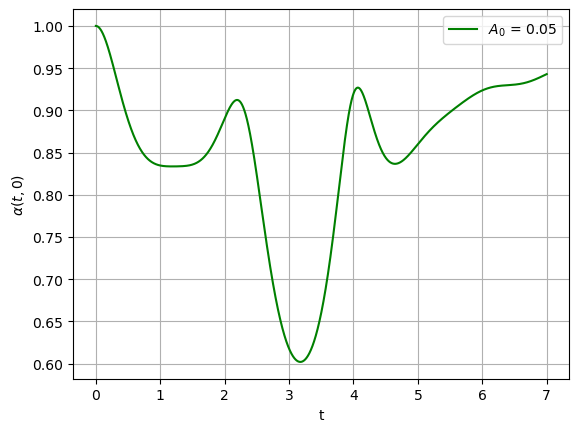

In [186]:
# Searching for critical amplitude:

#Alpha_origin_disp = Alpha_origin
#Alpha_origin_collapse = Alpha_origin

plt.plot(t1, Alpha_origin, color = "g", label = f"$A_0$ = {A0}")
#plt.plot(t1, Alpha_origin_collapse, color = "y", label = "$A_0$ = {:}".format(A0))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.grid()
plt.legend()

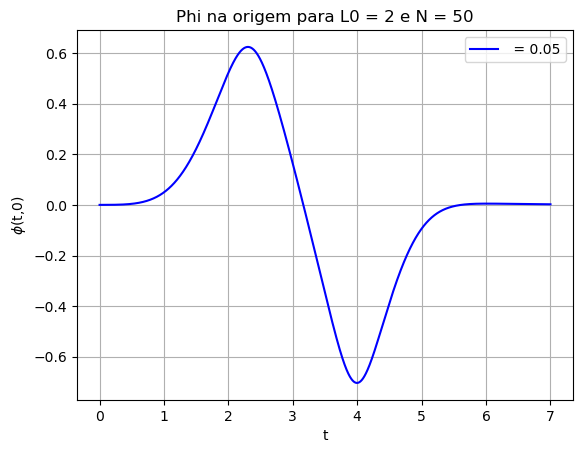

In [187]:
# Phi origin

plt.plot(t1, phi_origin, color = "b", label = " = {:}".format(A0))
plt.title("Phi na origem para L0 = 2 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")   
plt.grid()
plt.legend() 

Text(0.5, 1.0, 'log(L2Hc) para $N = 200$, $L_0 = 20$ e $A_0 = $')

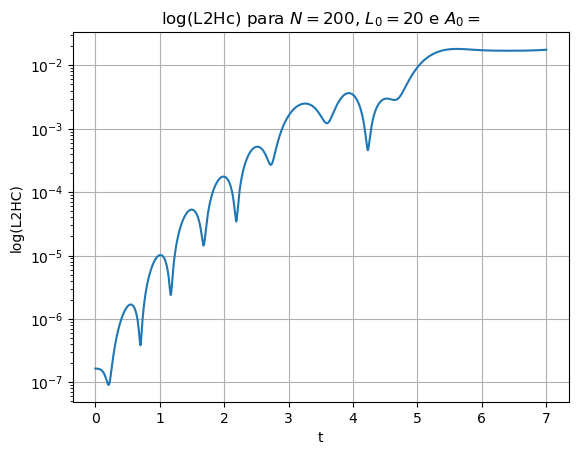

In [188]:
# Erro L2 of Hamiltonian constraint

plt.plot(t1,L2HC)
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.grid()
plt.title("log(L2Hc) para $N = 200$, $L_0 = 20$ e $A_0 = $")

Text(0.5, 1.0, 'log(L2MC) para $N = 50$, $L_0 = 2$')

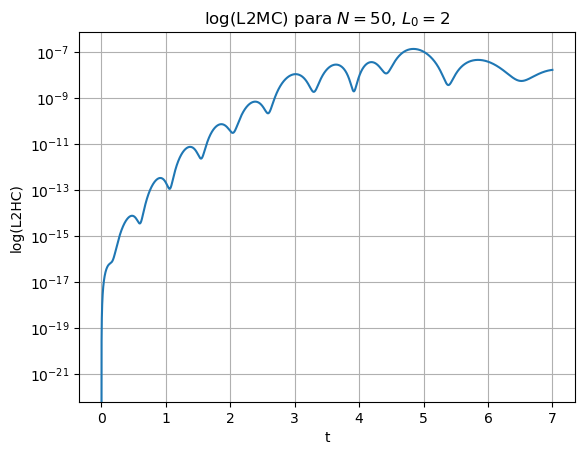

In [189]:
# Erro L2 of momentum constraint

plt.plot(t1,L2MC,label = "$A_0$ = {:}".format(A0))
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.grid()
plt.title("log(L2MC) para $N = 50$, $L_0 = 2$")

In [ ]:
# Mass ADM error

plt.plot(t1, Madm_error, color = "r", label = "$A_0$ = {:}".format(A0))
plt.title("Mass ADM para L0 = 1 e N = {:}".format(N) )
plt.ylabel("Madm")
plt.xlabel("t")  
#plt.yscale('log')
#plt.grid()
plt.legend() 

In [ ]:
#L2HC_50_L02 = max(L2HC)
#L2HC_50_L05 = max(L2HC)
#L2HC_50_L010 = max(L2HC)

#L2HC_100_L02 = max(L2HC)
#L2HC_100_L05 = max(L2HC)
#L2HC_100_L010 = max(L2HC)

#L2HC_150_L02 = max(L2HC)
#L2HC_150_L05 = max(L2HC)
#L2HC_150_L010 = max(L2HC)

#L2HC_200_L02 = max(L2HC)
#L2HC_200_L05 = max(L2HC)
#L2HC_200_L010 = max(L2HC)

#L2HC_250_L02 = max(L2HC)
#L2HC_250_L05 = max(L2HC)
#L2HC_250_L010 = max(L2HC)

#L2HC_300_L02 = max(L2MC)
#L2HC_300_L05 = max(L2MC)
#L2HC_300_L010 = max(L2MC)

In [ ]:
print('L2HC_50_L02 =',L2HC_50_L02,'L2HC_50_L05 =', L2HC_50_L05, 'L2HC_50_L010 =',L2HC_50_L010,'L2HC_100_L02 =',L2HC_100_L02,'L2HC_100_L05 =', L2HC_100_L05, 'L2HC_100_L010 =',L2HC_100_L010,'L2HC_150_L02 =',L2HC_150_L02,'L2HC_150_L05 =', L2HC_150_L05, 'L2HC_150_L010 =',L2HC_150_L010,'L2HC_200_L02 =',L2HC_200_L02,'L2HC_200_L05 =', L2HC_200_L05, 'L2HC_200_L010 =',L2HC_200_L010, 'L2HC_250_L02 =',L2HC_250_L02,'L2HC_250_L05 =', L2HC_250_L05, 'L2HC_250_L010 =',L2HC_250_L010, sep = '\n')

In [ ]:
# Code convergency for momentum contraint:

#L2MC_50_L02 = max(L2MC)
#L2MC_50_L05 = max(L2MC)
#L2MC_50_L010 = max(L2MC)

#L2MC_100_L02 = max(L2MC)
#L2MC_100_L05 = max(L2MC)
#L2MC_100_L010 = max(L2MC)

#L2MC_150_L02 = max(L2MC)
#L2MC_150_L05 = max(L2MC)
#L2MC_150_L010 = max(L2MC)

#L2MC_200_L02 = max(L2MC)
#L2MC_200_L05 = max(L2MC)
#L2MC_200_L010 = max(L2MC)

#L2MC_250_L02 = max(L2MC)
#L2MC_250_L05 = max(L2MC)
#L2MC_250_L010 = max(L2MC)

#L2MC_300_L02 = max(L2MC)
#L2MC_300_L05 = max(L2MC)
#L2MC_300_L010 = max(L2MC)

In [ ]:
print('L2MC_50_L02 =',L2MC_50_L02,'L2MC_50_L05 =', L2MC_50_L05, 'L2MC_50_L010 =',L2MC_50_L010,'L2MC_100_L02 =',L2MC_100_L02,'L2MC_100_L05 =', L2MC_100_L05, 'L2MC_100_L010 =',L2MC_100_L010,'L2MC_150_L02 =',L2MC_150_L02,'L2MC_150_L05 =', L2MC_150_L05, 'L2MC_150_L010 =',L2MC_150_L010,'L2MC_200_L02 =',L2MC_200_L02,'L2MC_200_L05 =', L2MC_200_L05, 'L2MC_200_L010 =',L2MC_200_L010, 'L2MC_250_L02 =',L2MC_250_L02,'L2MC_250_L05 =', L2MC_250_L05, 'L2MC_250_L010 =',L2MC_250_L010, sep = '\n')

In [ ]:


L2HC_50_L02 =0.01816391546619686
L2HC_50_L05 =0.0002546176908516956
L2HC_50_L010 =0.002733059112102552
L2HC_100_L02 =0.0027662912019201643
L2HC_100_L05 =1.3791713620705118e-06
L2HC_100_L010 =1.4069193497023997e-05
L2HC_150_L02 =0.0004488248226698636
L2HC_150_L05 =9.503741887713358e-09
L2HC_150_L010 =3.058868117659927e-08
L2HC_200_L02 =1.8196716483457423e-05
L2HC_200_L05 =4.542907764384823e-09
L2HC_200_L010 =3.349944877536477e-11
L2HC_250_L02 =8.89094083876591e-07
L2HC_250_L05 =2.6213587923518953e-09
L2HC_250_L010 =2.2760809719282817e-11

L2HC_L02 = [L2HC_50_L02, L2HC_100_L02, L2HC_150_L02, L2HC_200_L02, L2HC_250_L02]

L2HC_L05 = [L2HC_50_L05, L2HC_100_L05, L2HC_150_L05, L2HC_200_L05, L2HC_250_L05]

L2HC_L010 = [L2HC_50_L010, L2HC_100_L010, L2HC_150_L010, L2HC_200_L010, L2HC_250_L010]

Ns = [50,100,150,200,250]

plt.plot(Ns, L2HC_L02, '-b^', label = "L0 = 2", markersize = 10, markerfacecolor='none')
plt.plot(Ns, L2HC_L05, '-rs',label = "L0 = 5", markersize = 10, markerfacecolor='none')
plt.plot(Ns, L2HC_L010, '-ko',label = "L0 = 10", markersize = 10, markerfacecolor='none')
plt.xticks(Ns)
plt.tick_params(axis='both', which='both', labelsize=12)  # Ajusta o tamanho dos ticks em ambos os eixos
plt.xlabel('N', fontsize = 14)
plt.ylabel('$L_2(HC)max$', fontsize = 14)
plt.yscale('log')
plt.grid(which='both', linestyle='--', linewidth=0.5)  # Grades principais
plt.minorticks_on()  # Ativa grades menores
plt.legend()
plt.show()

In [ ]:
# Plot 3D from scalar field at t = constant:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,6))
#ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

y = phi_set[] # 5 plots from t = 0, .., 10
x = rplot
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

xn = np.outer(x, np.cos(theta))
yn = np.outer(x, np.sin(theta))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i,:] = np.full_like(zn[0,:], y[i])


ax2.plot_surface(xn, yn, zn)

     
#ax1.plot(x, y)
#surf = ax2.plot_surface(xn, yn, zn, rstride = 1, cmap = 'viridis', edgecolor = 'none')
#fig.colorbar(surf, ax = ax2, shrink = 0.5, aspect = 5)  # adiciona barra de cores para a superfície 3D
#ax1.view_init(elev = 30, azim = 30)  # ajusta a perspectiva
#ax2.view_init(elev = 30, azim = 30)
#ax2.grid(False)
#plt.axis('off')
plt.show()

In [ ]:
phi_set[49999]

In [ ]:
# Animation plot for Phi: Scalar Field
        
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

fig = plt.figure()
ax = plt.axes(xlim=(0, 10),ylim = (-2, 1.5))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)
x = rplot

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    time_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  time_text.set_text("Time ="+str(round(h+h*i,2)))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.2, blit=True)

#HTML(anim.to_html5_video())
if A0 > 0.0819:
    anim.save("animation_colapse.mp4")
else:
    anim.save("animation_dispersion.mp4")
    
        